# Team 
### Anirudh Iyer (avi2011)
### Asish Boggavarapu (ab10535)
### Shruti Wagle (sgw6735)

In [ ]:
df = spark.read.option("delimiter", ";").csv("/mnt/name/airbnb-listings.csv", header=True, inferSchema=True)

In [ ]:
import pandas as pd
import numpy as np
from pyspark.sql import SparkSession
from pyspark.sql.functions import *
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

In [ ]:
df = df.filter(df["City"].isNotNull())
df = df.filter(~df["City"].rlike("[0-9]"))
df = df.filter(~(col("City").contains("email") | col("City").contains("phone")))
df = df.filter(df["Price"].isNotNull())
df = df.filter(df["Price"].rlike("^[0-9]+(\.[0-9]+)?$"))
df = df.filter((~df["Property Type"].rlike("^[0-9]+(\.[0-9]+)?$")) 
              & (~df["Property Type"].startswith("-"))
              & (~df["Property Type"].startswith("https")))

df = df.fillna("Others", subset=["Bedrooms", "Bathrooms", "Cancellation Policy"])
df = df.fillna("1",subset=["Review Scores Cleanliness","Review Scores Communication"])
df = df.withColumn("Price", col("Price").cast("float"))
df = df.withColumn("Availability 365", col("Availability 365").cast("float"))

# Counts of listings by city

In [ ]:
counts_by_city_desc = df.groupBy("City").count().orderBy(desc("count")).limit(10)
counts_by_city_aesc = df.groupBy("City").count().orderBy("count").limit(10)

counts_by_city_desc_pd = counts_by_city_desc.toPandas()
counts_by_city_aesc_pd = counts_by_city_aesc.toPandas()

In [ ]:
concatenated_df = pd.concat([counts_by_city_desc_pd, counts_by_city_aesc_pd])

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

def barplot_top_20_cities_count(x, y, label):
    # Create a gradient color map
    cmap = LinearSegmentedColormap.from_list('custom_gradient', ['red', 'blue'], N=len(y))

    plt.figure(figsize=(20, 10))
    bars = plt.bar(x, y, color=cmap(range(len(y))))

    for bar in bars:
        height = bar.get_height()
        plt.annotate(f"{int(height)}", xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3),
                     textcoords="offset points", ha="center", va="bottom")

    plt.title('Distribution of ' + label)
    plt.xlabel(label)
    plt.ylabel('Count')

    plt.xticks(rotation=90)
    plt.tight_layout()

    # Show the plot or save it to a file
    plt.show()

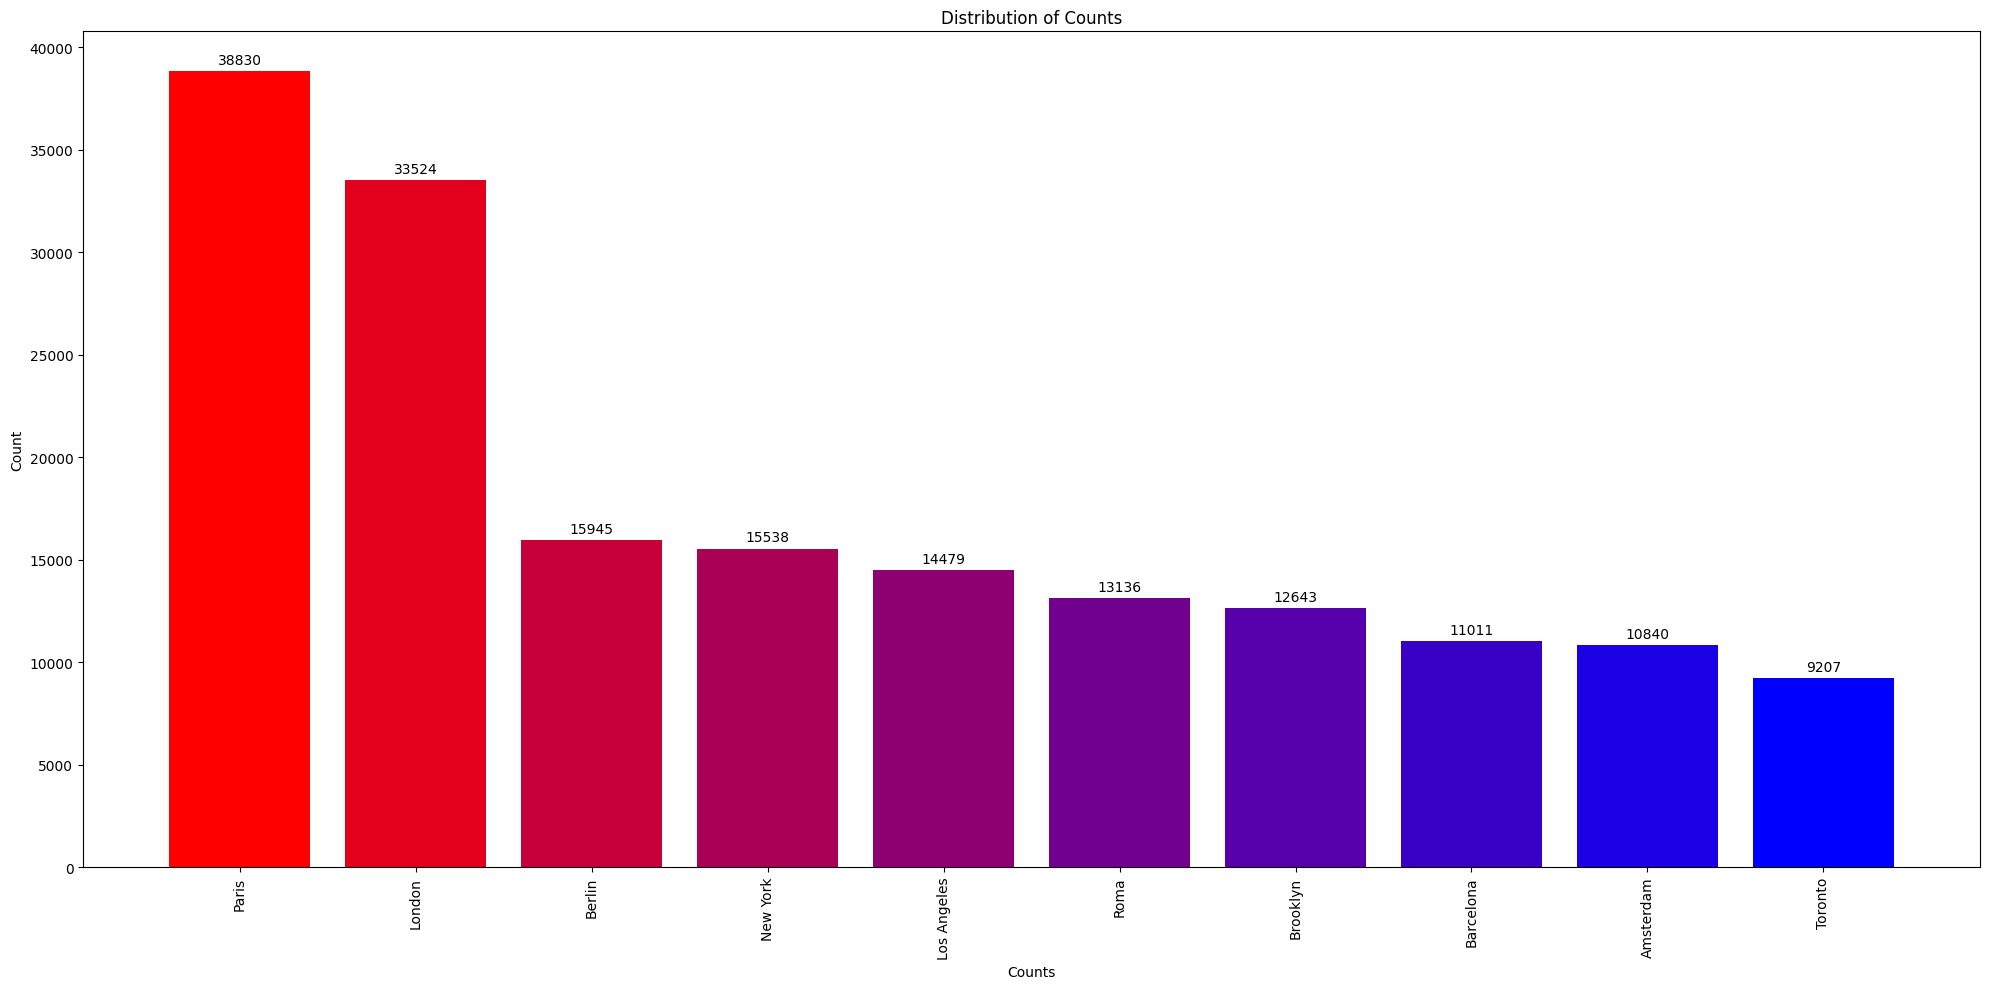

In [ ]:
barplot_top_20_cities_count(counts_by_city_desc_pd["City"],counts_by_city_desc_pd["count"],"Counts")

# average price by city

In [ ]:
counts_by_city_desc = df.groupBy("City").count().orderBy(desc("count")).limit(10)
counts_by_city_aesc = df.groupBy("City").count().orderBy("count").limit(10)

counts_by_city_desc_pd = counts_by_city_desc.toPandas()
counts_by_city_aesc_pd = counts_by_city_aesc.toPandas()

In [ ]:
concatenated_df2 = pd.concat([counts_by_city_desc_pd, counts_by_city_aesc_pd])

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

def barplot_top_20_cities_count(x, y, label):
    # Create a gradient color map
    cmap = LinearSegmentedColormap.from_list('custom_gradient', ['red', 'blue'], N=len(y))

    plt.figure(figsize=(20, 10))
    bars = plt.bar(x, y, color=cmap(range(len(y))))

    for bar in bars:
        height = bar.get_height()
        plt.annotate(f"{int(height)}", xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3),
                     textcoords="offset points", ha="center", va="bottom")

    plt.title('Distribution of Properties by ' + label)
    plt.xlabel(label)
    plt.ylabel('Count')

    plt.xticks(rotation=90)
    plt.tight_layout()

    # Show the plot or save it to a file
    plt.show()

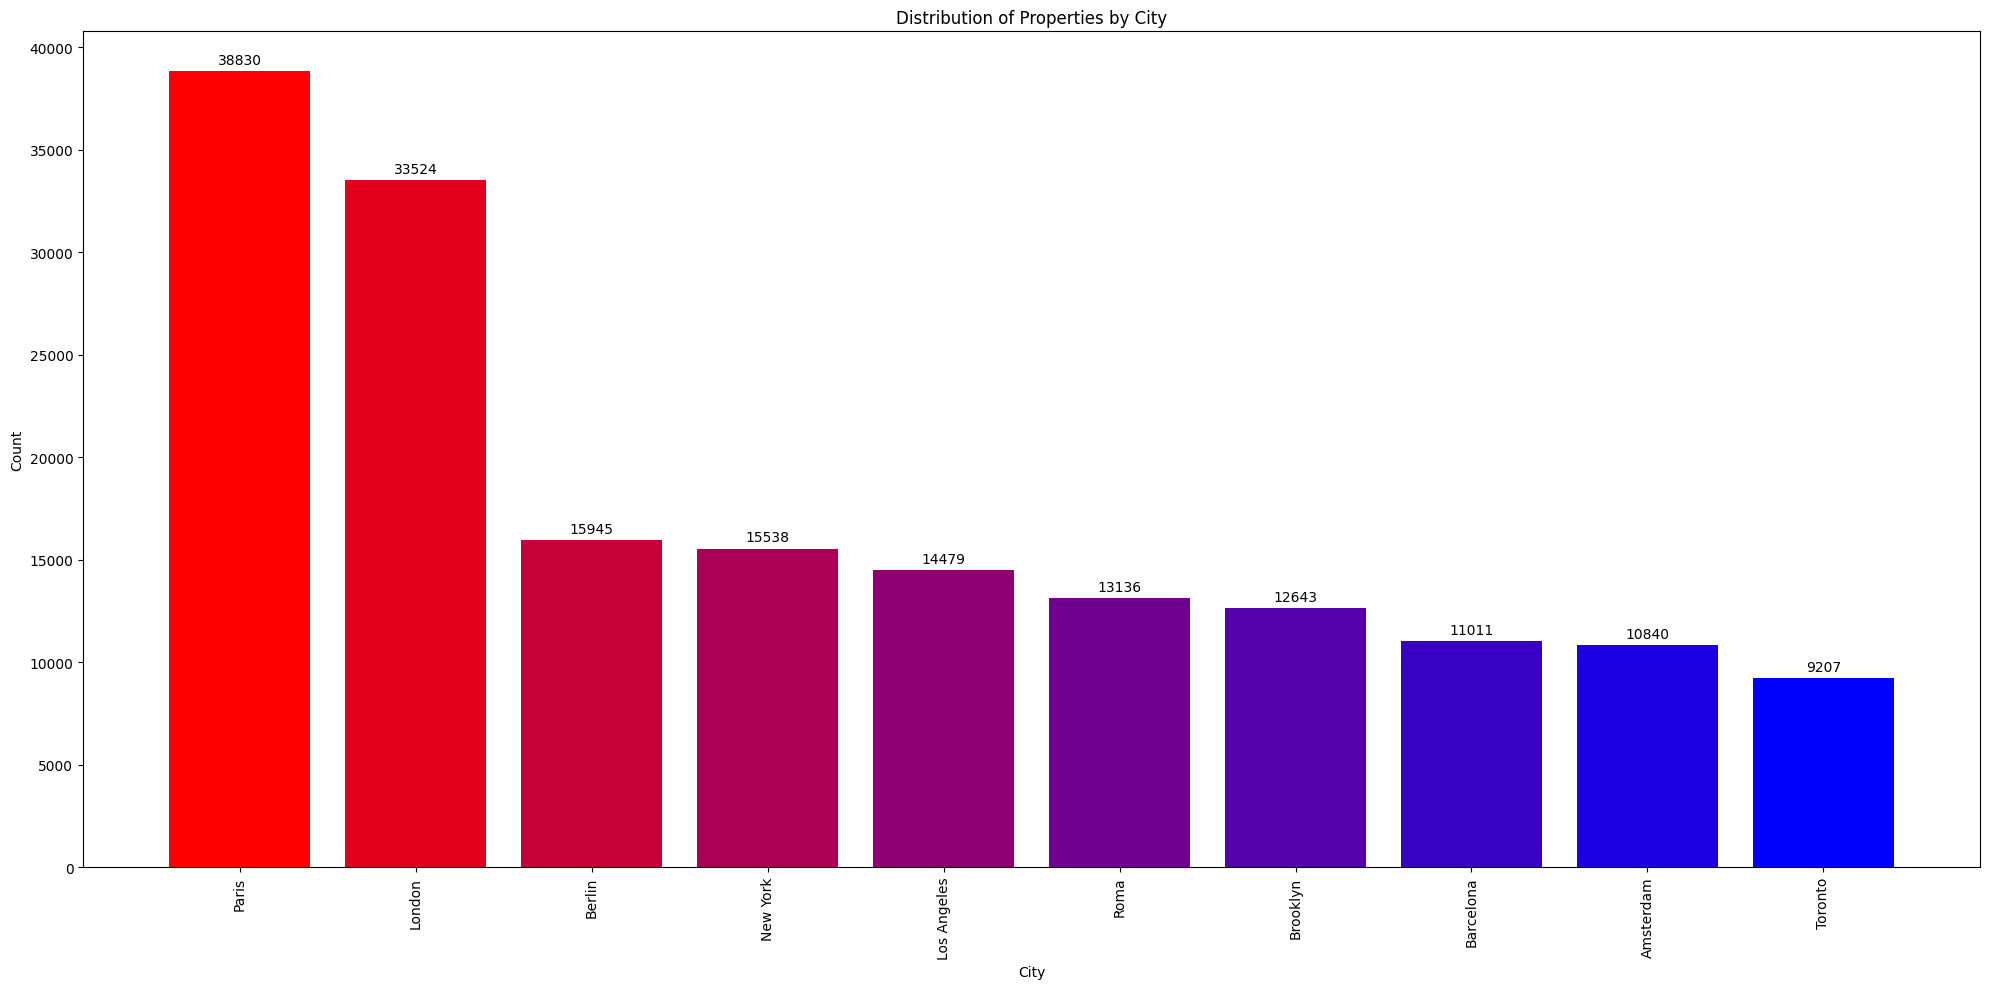

In [ ]:
barplot_top_20_cities_count(counts_by_city_desc_pd["City"],counts_by_city_desc_pd["count"],"City")

# Count of Property type, Bedrooms, Bathrooms


In [ ]:
prop_type_counts = df.groupBy("Property Type").count().orderBy(desc("count"))
bedrooms_counts = df.groupBy("Bedrooms").count().orderBy("Bedrooms")
bathrooms_counts = df.groupBy("Bathrooms").count().orderBy("Bathrooms")

# Convert the result to a Pandas DataFrame for visualization
prop_type_counts_pd = prop_type_counts.toPandas()
bedrooms_counts_pd = bedrooms_counts.toPandas()
bathrooms_counts_pd = bathrooms_counts.toPandas()

In [ ]:
def barplot_counts(x,y,label):
    # Create a bar plot using Matplotlib
    cmap = LinearSegmentedColormap.from_list('custom_gradient', ['blue', 'blue'], N=len(y))

    plt.figure(figsize=(20, 10))
    bars = plt.bar(x,y,color=cmap(range(len(y))))


    for bar in bars:
        height = bar.get_height()

        plt.annotate(f"{int(height)}", xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3),
                    textcoords="offset points", ha="center", va="bottom")


    plt.title('Distribution of ' + label)
    plt.xlabel(label)
    plt.ylabel('Count')

    plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
    plt.tight_layout()

    # Show the plot or save it to a file
    plt.show()

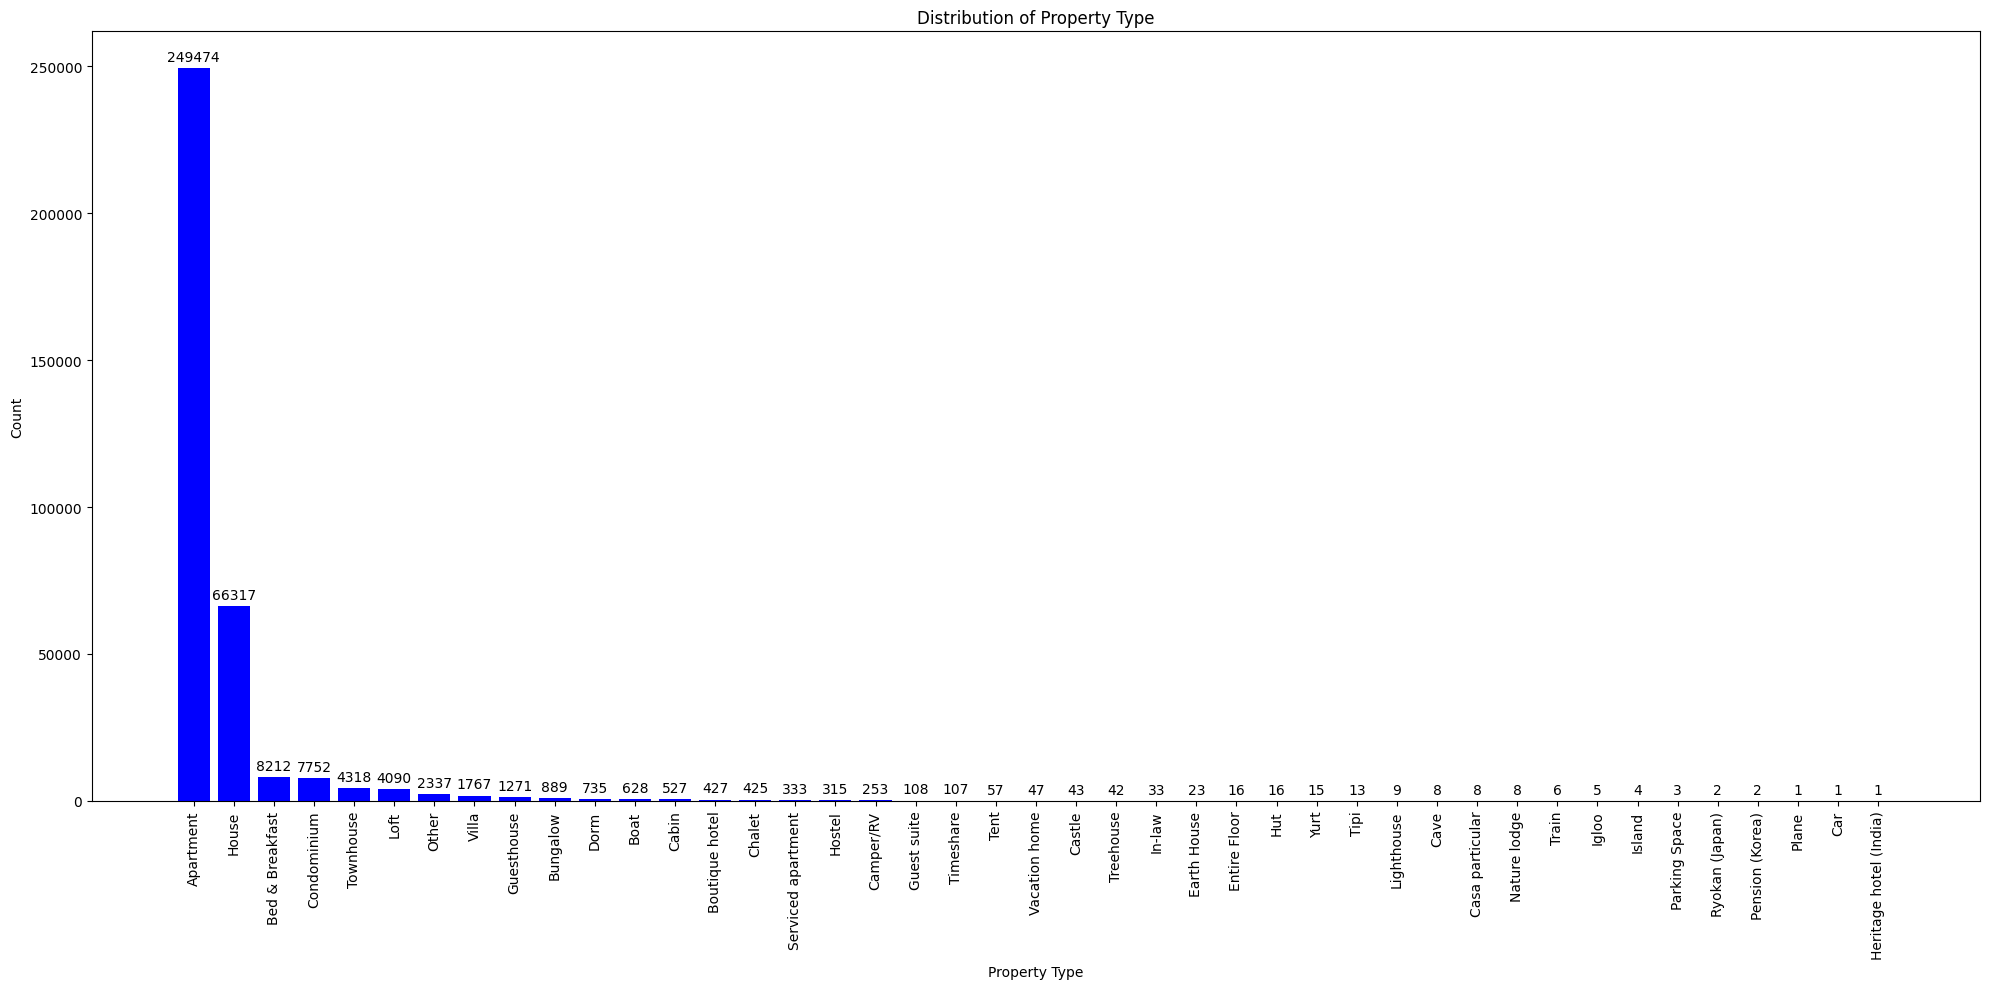

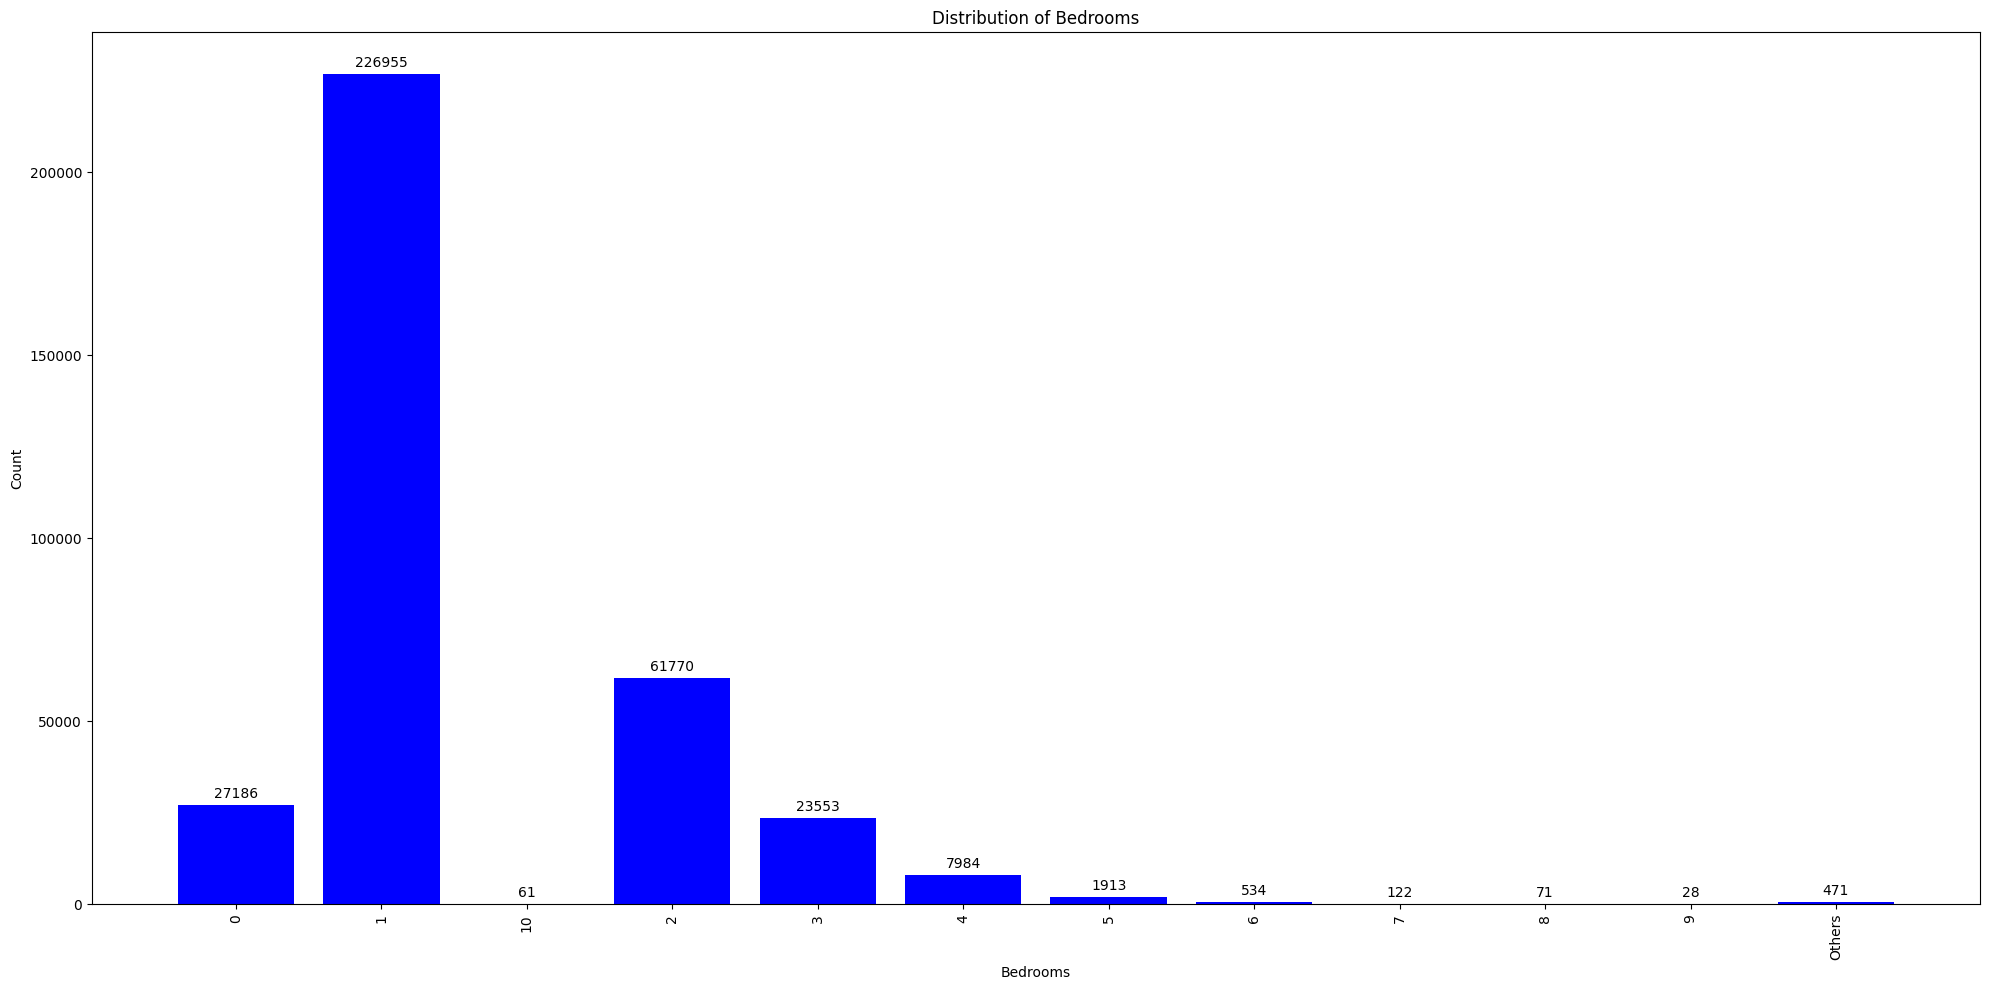

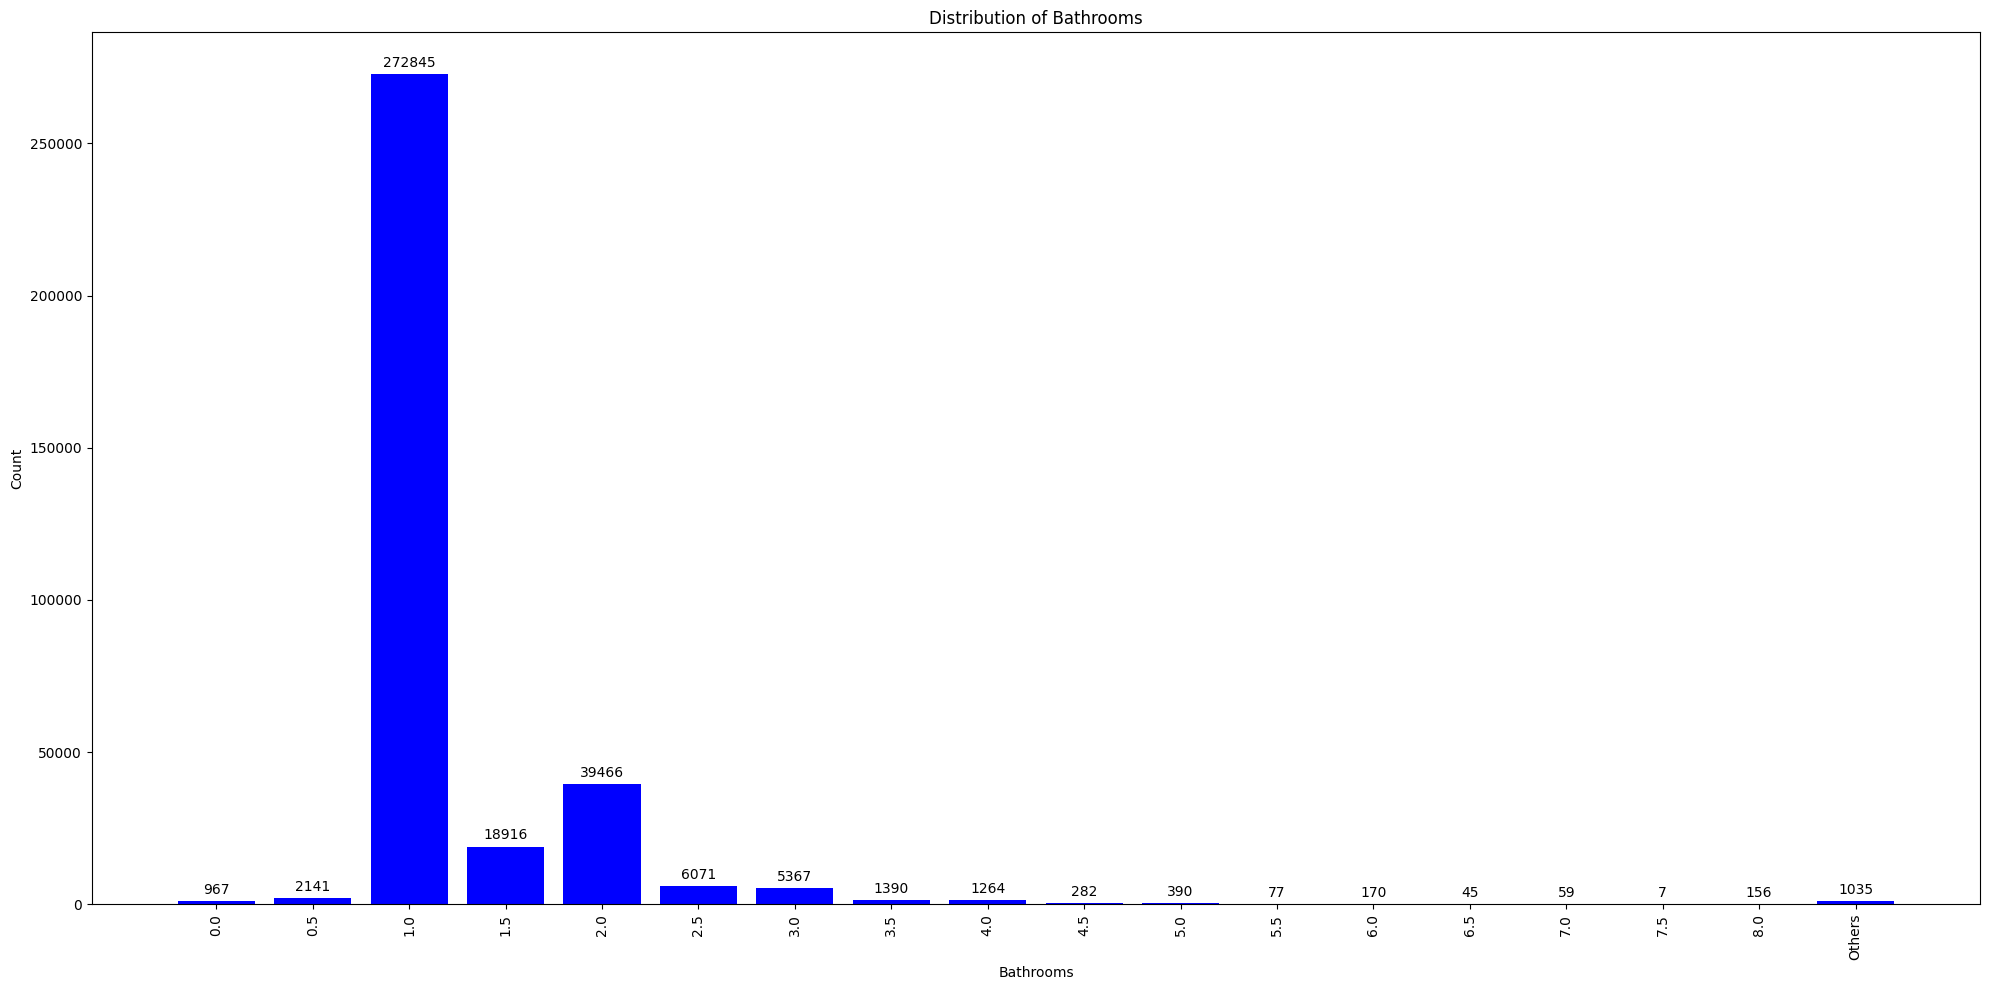

In [ ]:
barplot_counts(prop_type_counts_pd["Property Type"], prop_type_counts_pd["count"],label = "Property Type")
barplot_counts(bedrooms_counts_pd["Bedrooms"],bedrooms_counts_pd["count"],label = "Bedrooms")
barplot_counts(bathrooms_counts_pd["Bathrooms"],bathrooms_counts_pd["count"],label = "Bathrooms")

# number of bathrooms, bedrooms, properties vs their mean prices

In [ ]:
prop_type_agg = df.groupBy("Property Type").agg(mean("Price").alias("AveragePrice"), count("*").alias("Counts")).orderBy(desc("AveragePrice"))
# Group by 'Bedrooms' and calculate the mean price and count for each bedroom type
bedrooms_agg = df.groupBy("Bedrooms").agg(mean("Price").alias("AveragePrice"), count("*").alias("Counts")).orderBy("Bedrooms")

# Group by 'Bathrooms' and calculate the mean price and count for each bathroom type
bathrooms_agg = df.groupBy("Bathrooms").agg(mean("Price").alias("AveragePrice"), count("*").alias("Counts")).orderBy("Bathrooms")

# Convert the results to Pandas DataFrames for visualization
bedrooms_agg_pd = bedrooms_agg.toPandas()
bathrooms_agg_pd = bathrooms_agg.toPandas()
prop_type_agg_pd = prop_type_agg.toPandas()

In [ ]:
def barplot_price(x,y,label):
    # Create a bar plot using Matplotlib
    cmap = LinearSegmentedColormap.from_list('custom_gradient', ['blue', 'blue'], N=len(y))

    plt.figure(figsize=(20, 10))
    bars = plt.bar(x,y,color="blue")


    for bar in bars:
        height = bar.get_height()

        plt.annotate(f"{int(height)}", xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3),
                    textcoords="offset points", ha="center", va="bottom")


    plt.title('Distribution of ' + label)
    plt.xlabel(label)
    plt.ylabel('Price')

    plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
    plt.tight_layout()

    # Show the plot or save it to a file
    plt.show()

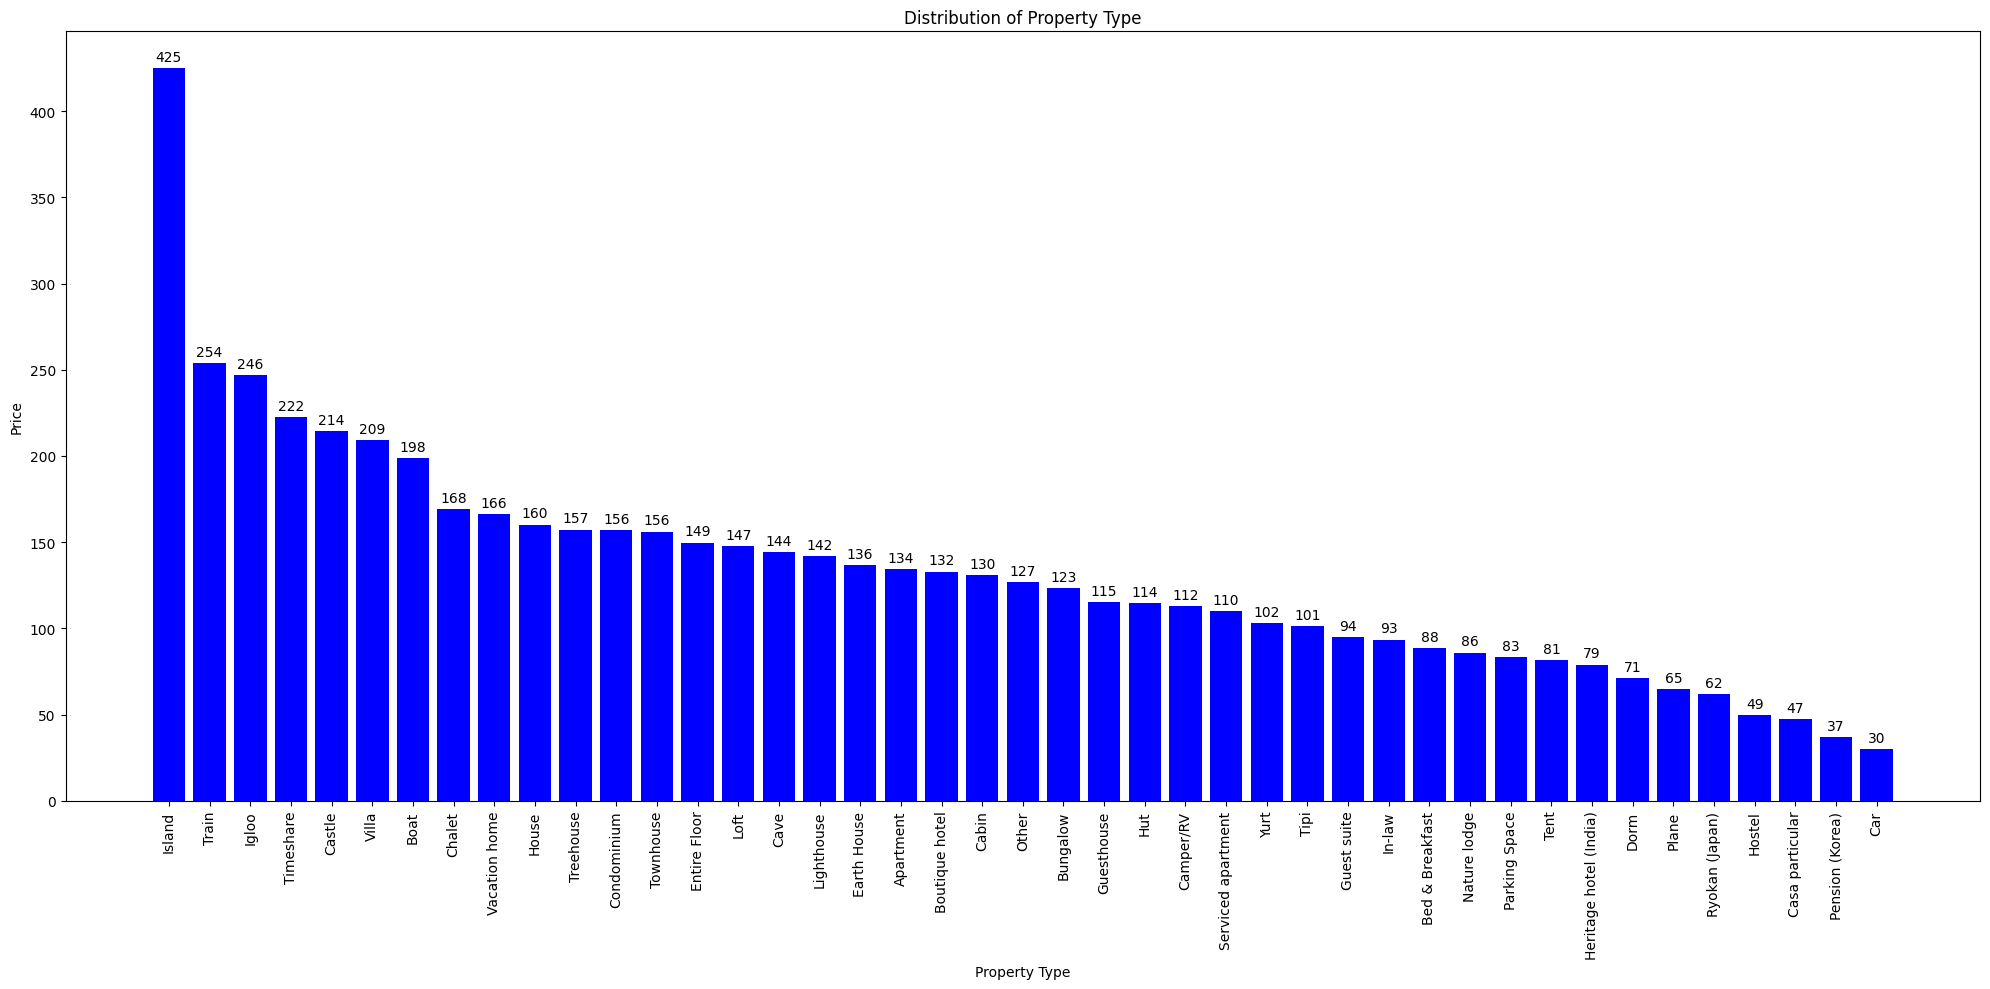

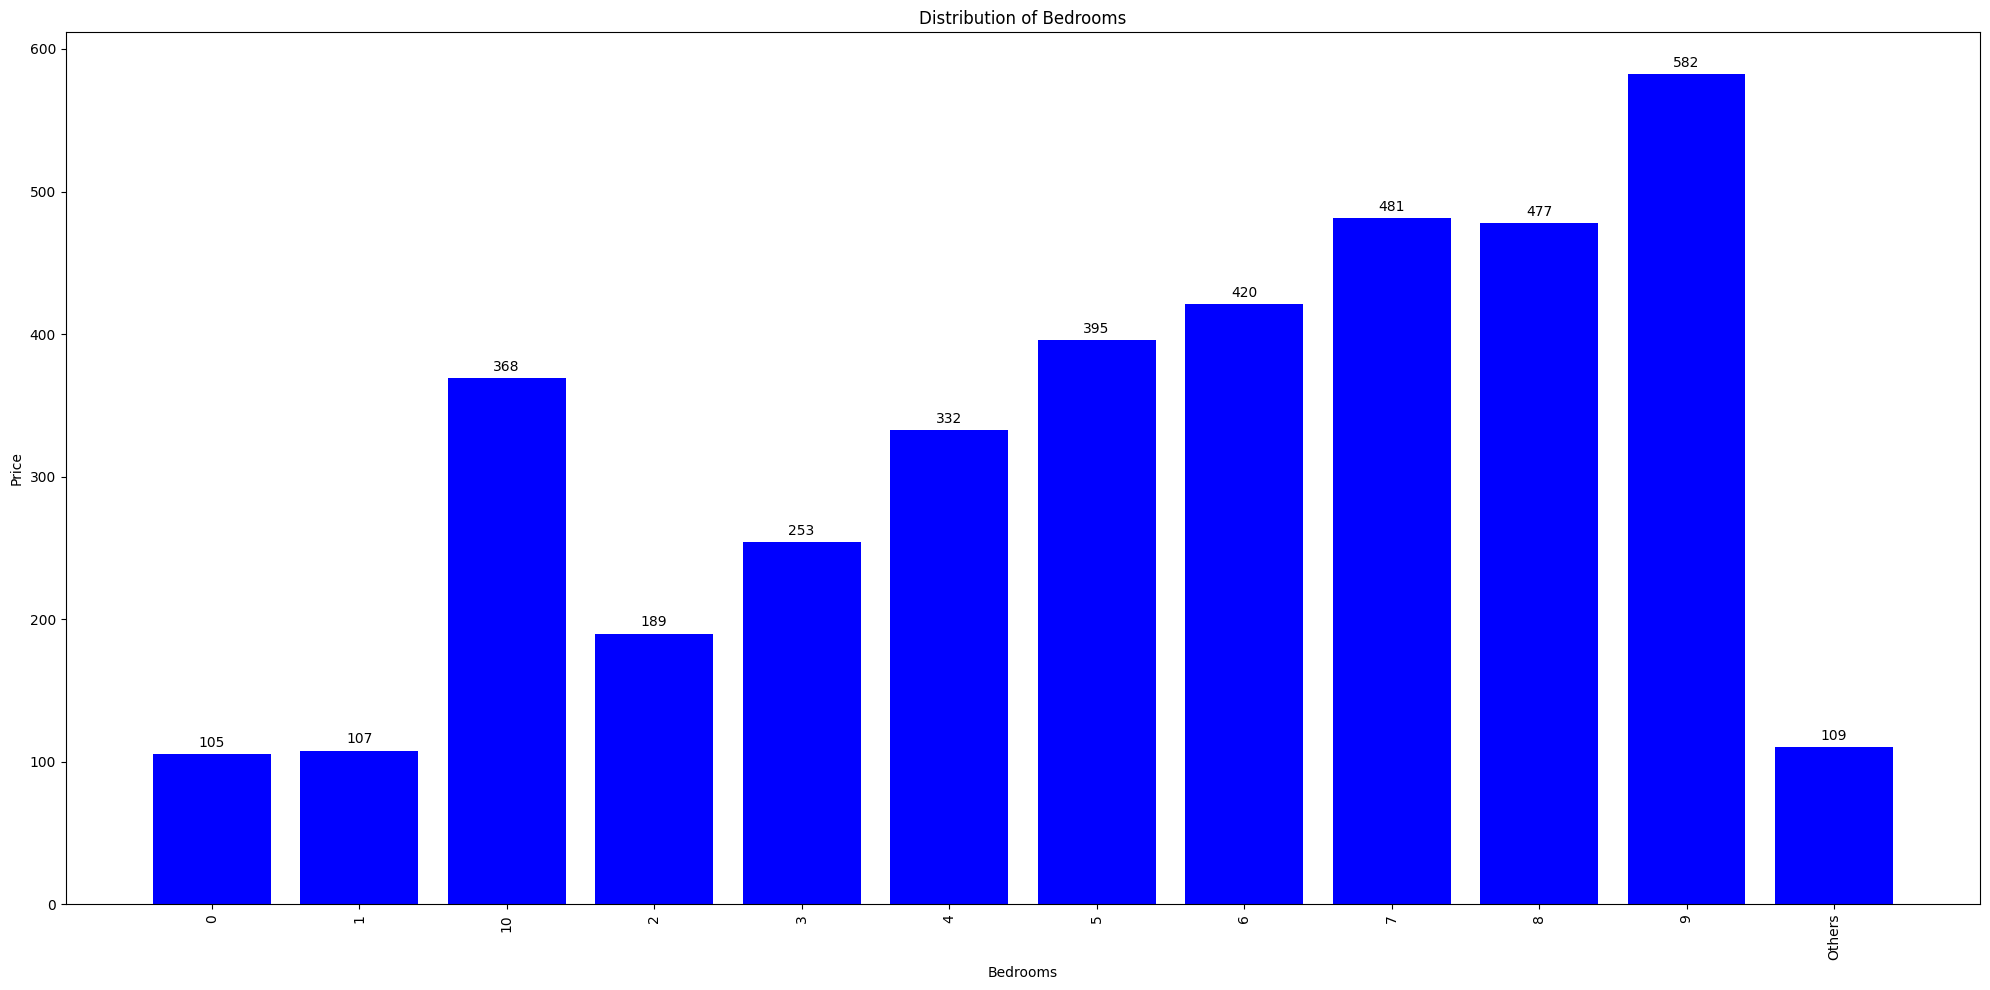

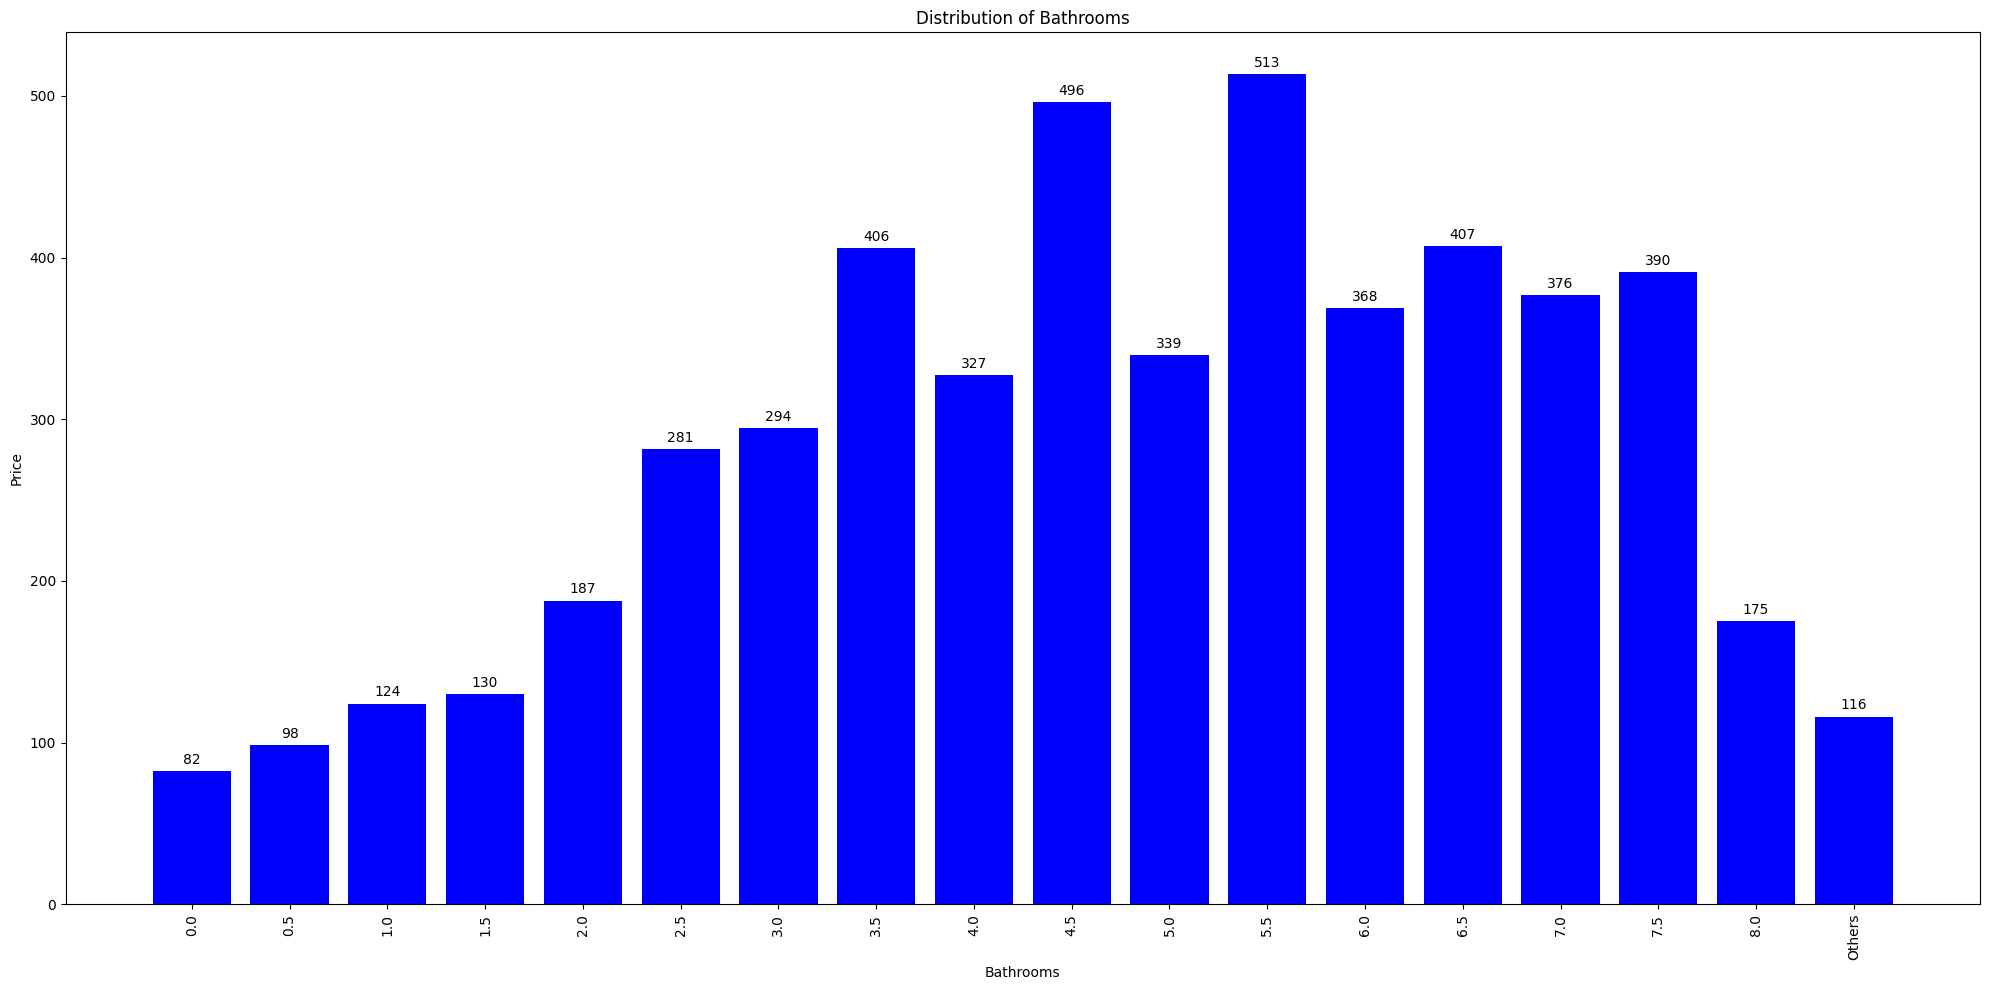

In [ ]:
barplot_price(prop_type_agg_pd["Property Type"],prop_type_agg_pd["AveragePrice"],label = "Property Type")
barplot_price(bedrooms_agg_pd["Bedrooms"],bedrooms_agg_pd["AveragePrice"],label = "Bedrooms")
barplot_price(bathrooms_agg_pd["Bathrooms"],bathrooms_agg_pd["AveragePrice"],label = "Bathrooms")

# Price Variation by No. of Bedrooms Bathrooms

In [ ]:
bedroom_prices = df.groupBy("Bedrooms").agg(collect_list("Price").alias("Prices")).orderBy("Bedrooms")
bathroom_prices = df.groupBy("Bathrooms").agg(collect_list("Price").alias("Prices")).orderBy("Bathrooms")

# Convert the collected prices to a Pandas DataFrame for box plot
bedroom_prices_pd = bedroom_prices.toPandas()
bathroom_prices_pd = bathroom_prices.toPandas()

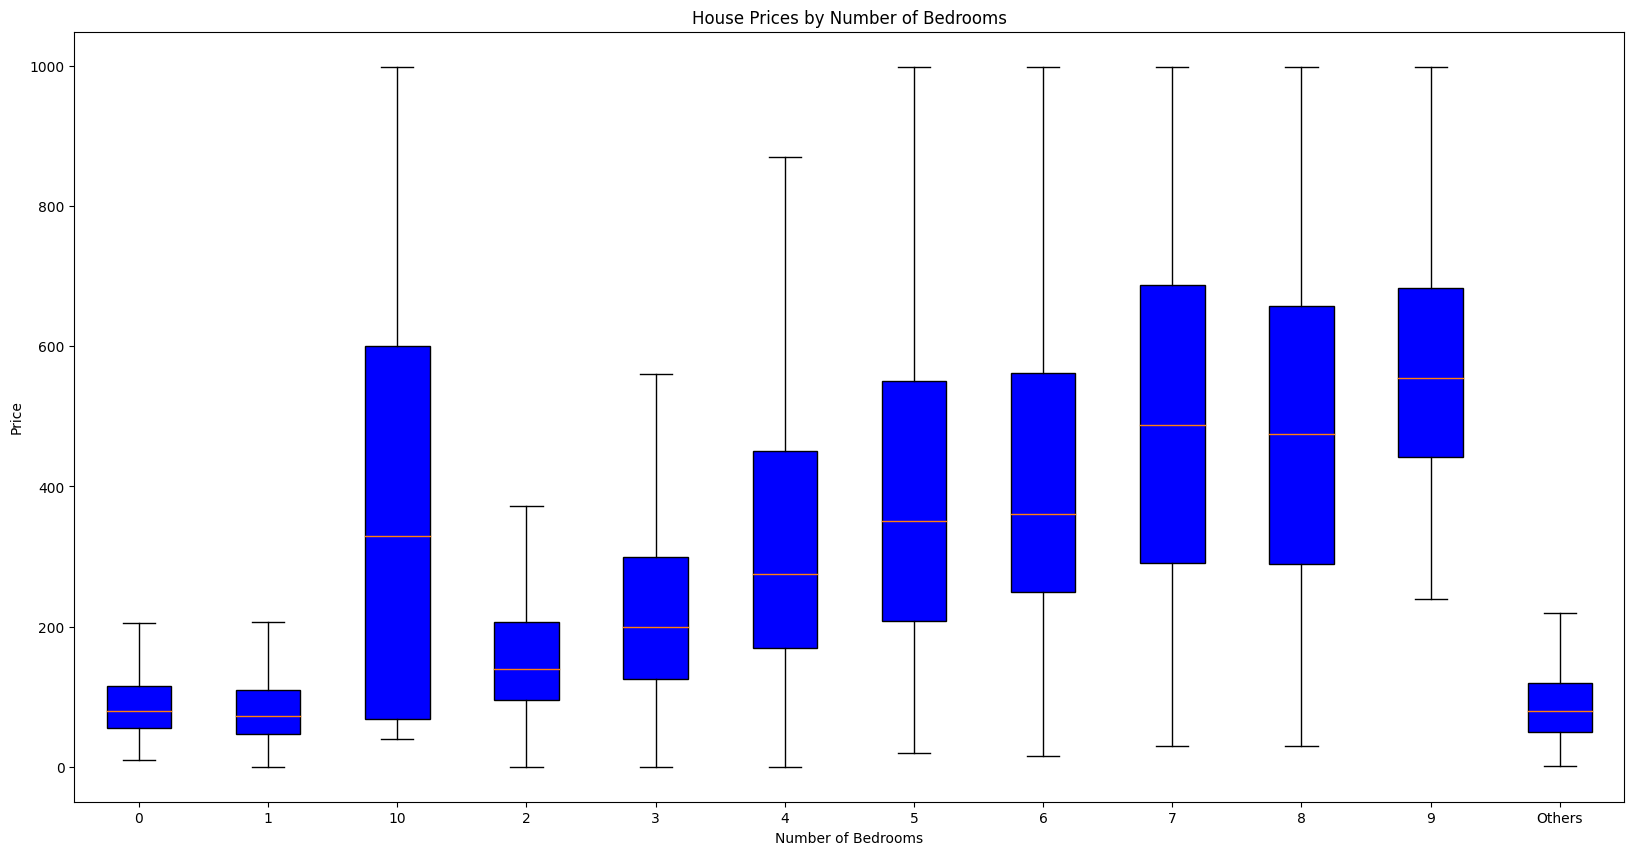

In [ ]:
import matplotlib.pyplot as plt

# Creating a boxplot
plt.figure(figsize=(20, 10))
boxplot = plt.boxplot(bedroom_prices_pd["Prices"], labels=bedroom_prices_pd["Bedrooms"].to_list(),patch_artist=True,manage_ticks=True, sym='')
for box in boxplot['boxes']:
    box.set(facecolor='blue')
plt.title('House Prices by Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.show()

# Availability vs bedrooms, property types

In [ ]:
bedrooms_avail = df.groupBy("Bedrooms").agg(mean("Availability 365").alias("Availability")).orderBy(("Bedrooms"))
property_avail = df.groupBy("Property Type").agg(mean("Availability 365").alias("Availability")).orderBy(desc("Availability"))

# Convert the collected prices to a Pandas DataFrame for box plot
bedroom_avail_pd = bedrooms_avail.toPandas()
property_avail_pd = property_avail.toPandas()

In [ ]:
def barplot_avail(x,y,label):
    # Create a bar plot using Matplotlib
    plt.figure(figsize=(20, 10))
    cmap = LinearSegmentedColormap.from_list('custom_gradient', ['red', 'blue'], N=len(y))

    bars = plt.bar(x,y,color=cmap(range(len(y))))


    for bar in bars:
        height = bar.get_height()

        plt.annotate(f"{int(height)}", xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3),
                    textcoords="offset points", ha="center", va="bottom")


    plt.title('Distribution of ' + label)
    plt.xlabel(label)
    plt.ylabel('Availability')

    plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
    plt.tight_layout()

    # Show the plot or save it to a file
    plt.show()

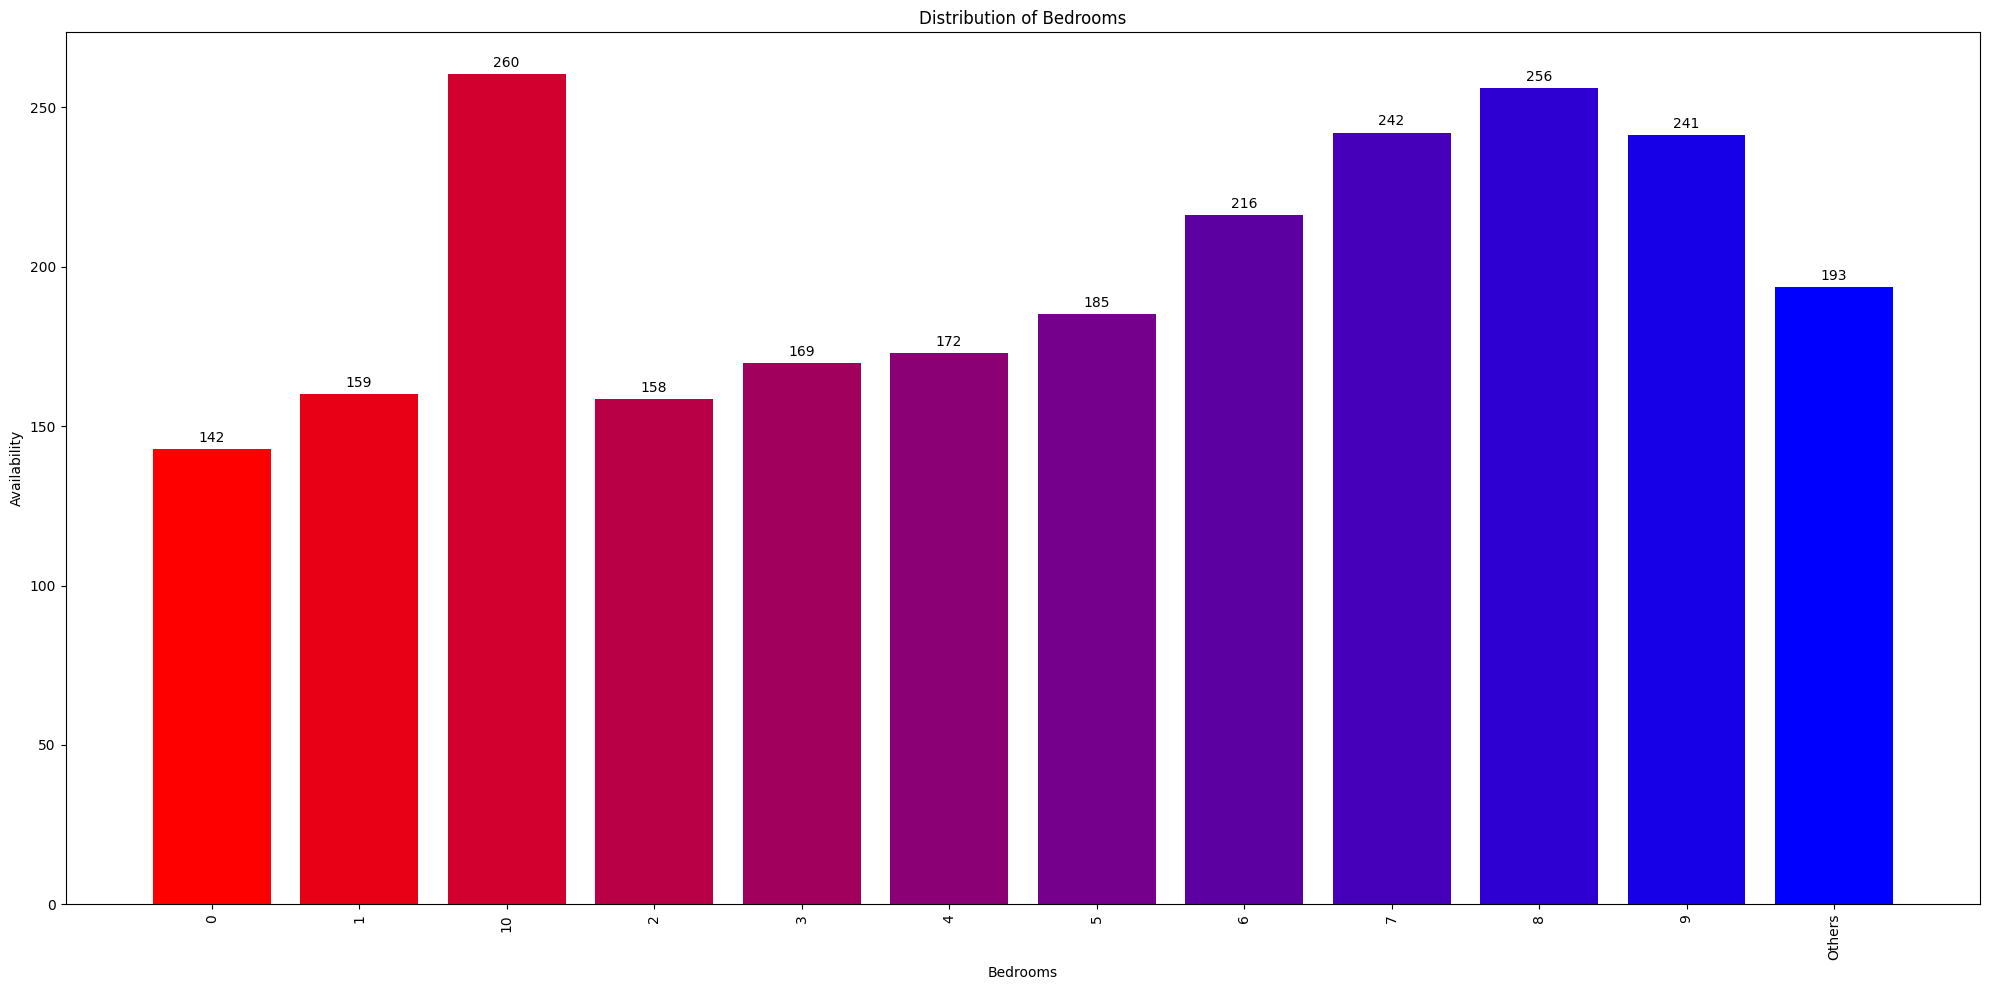

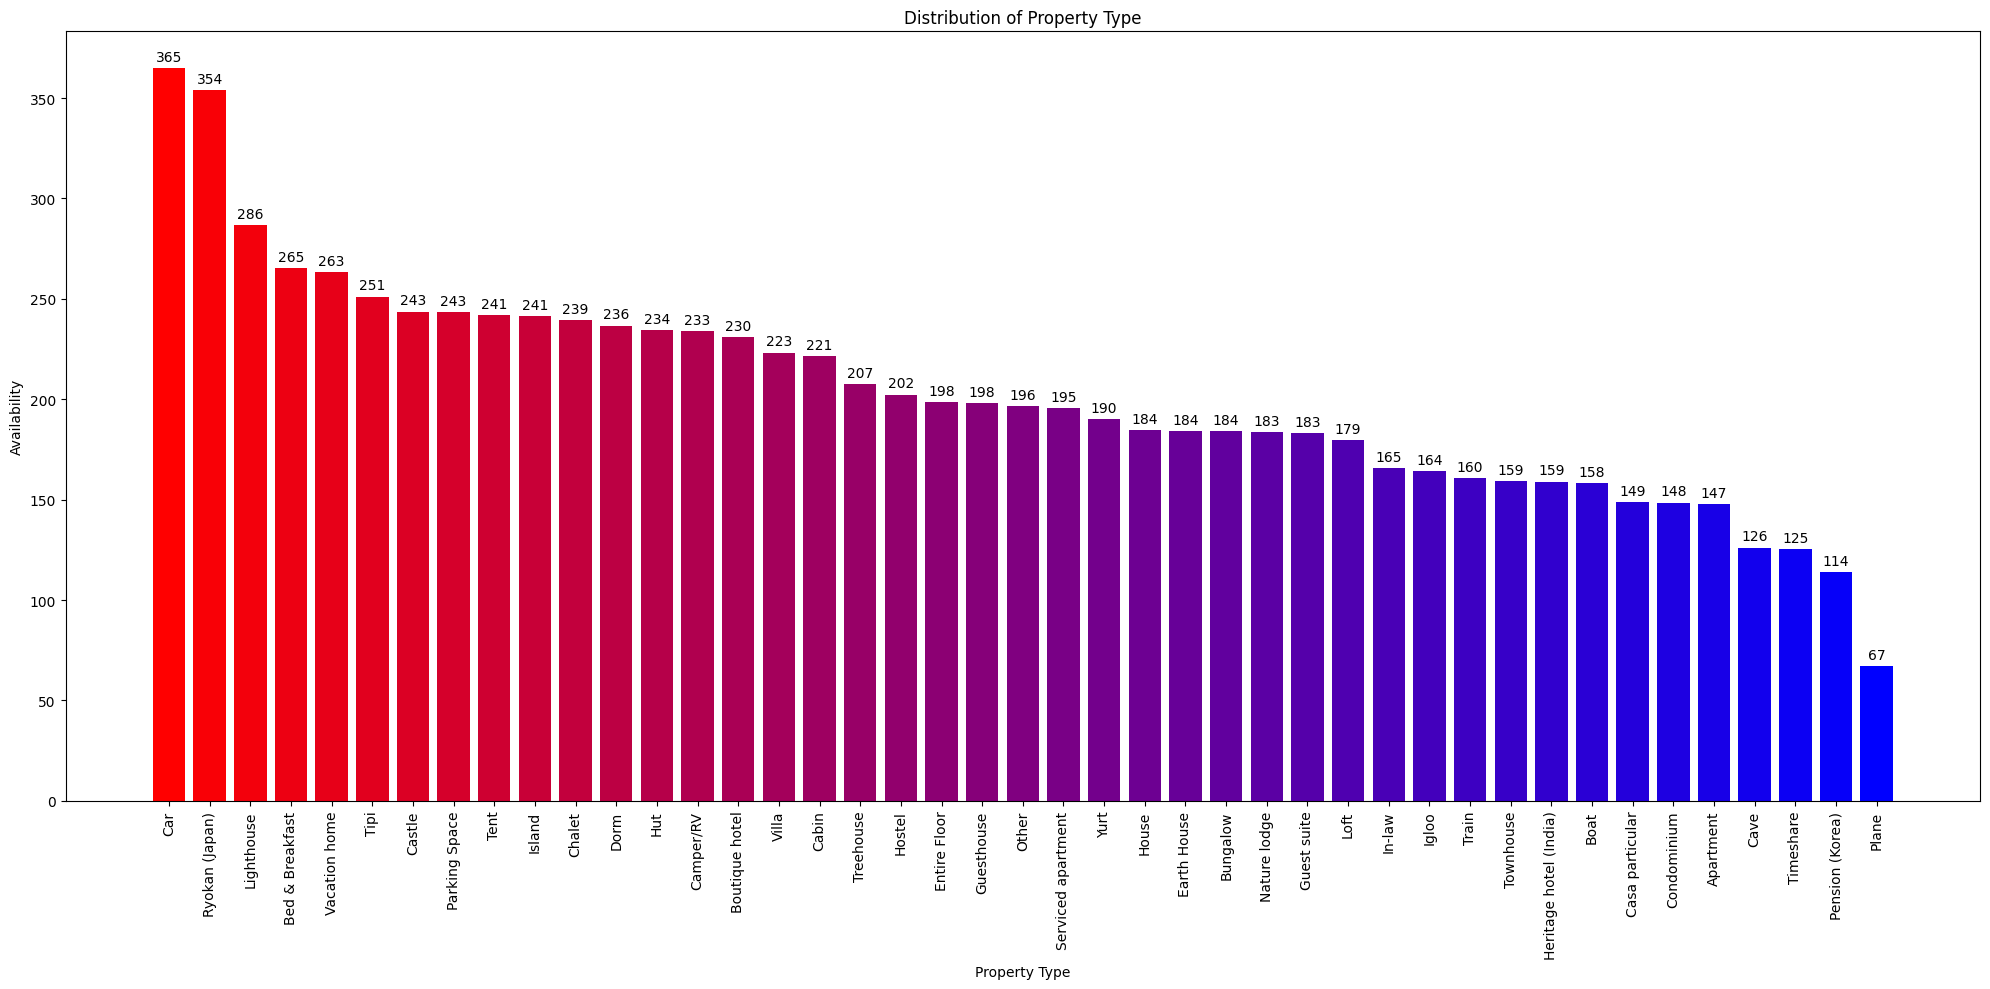

In [ ]:
barplot_avail(bedroom_avail_pd["Bedrooms"],bedroom_avail_pd["Availability"],label = "Bedrooms")
barplot_avail(property_avail_pd["Property Type"],property_avail_pd["Availability"],label = "Property Type")

# Cancellation policy


In [ ]:
cancel_avail = df.groupBy("Cancellation Policy").agg(mean("Availability 365").alias("Availability")).orderBy(desc("Availability"))
cancel_avail_pd = cancel_avail.toPandas()

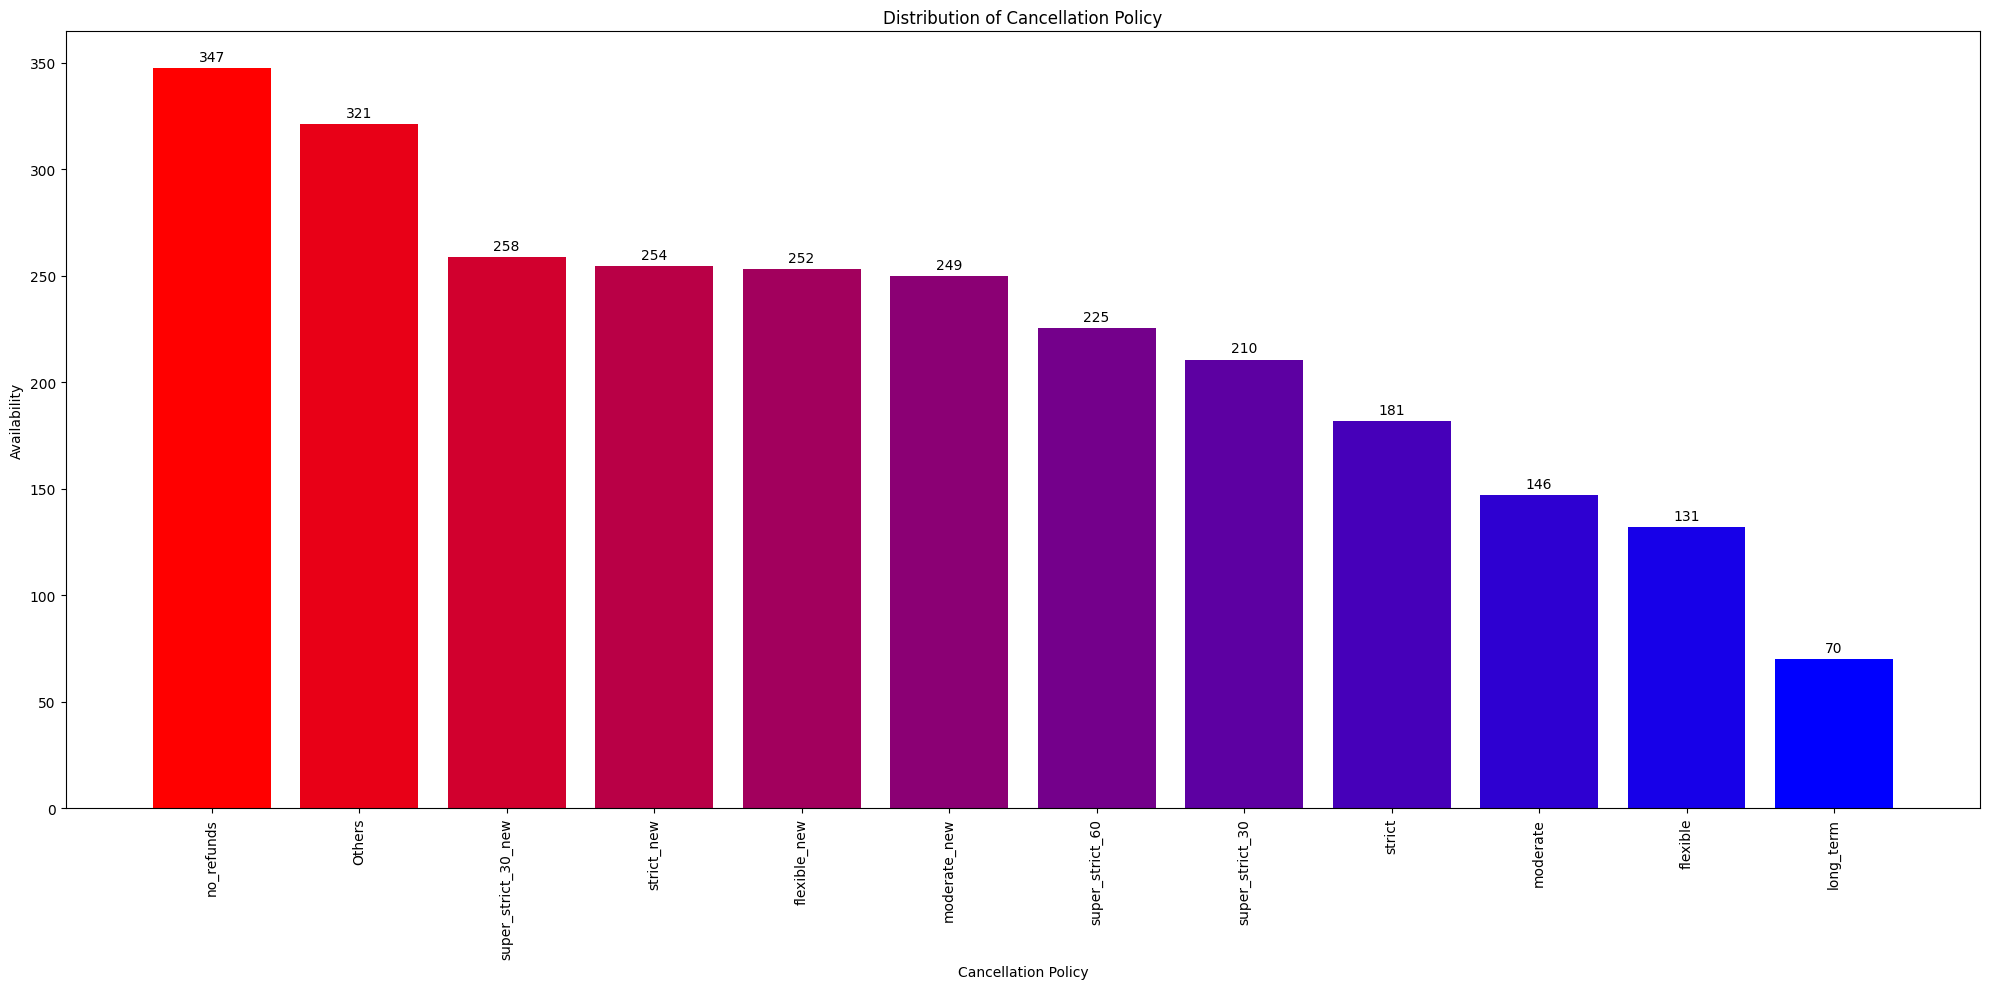

In [ ]:
barplot_avail(cancel_avail_pd["Cancellation Policy"],cancel_avail_pd["Availability"],label = "Cancellation Policy")

# Amenities

In [ ]:
# Split the "Amenities" column at commas and explode the array
df_amenity_exploded = df.withColumn("Amenities", explode(split(col("Amenities"), ",")))

# Group by amenity and count occurrences
amenity_counts = df_amenity_exploded.groupBy("Amenities").count().orderBy("count", ascending=False).limit(20)

# Convert the result to Pandas for plotting
amenity_counts_pd = amenity_counts.toPandas()

In [ ]:
def barplot_amenity_counts(x,y,label):
    # Create a bar plot using Matplotlib
    plt.figure(figsize=(20, 10))
    bars = plt.bar(x,y)
    cmap = LinearSegmentedColormap.from_list('custom_gradient', ['red', 'blue'], N=len(y))


    for bar in bars:
        height = bar.get_height()

        plt.annotate(f"{int(height)}", xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3),
                    textcoords="offset points", ha="center", va="bottom",rotation = 90)


    plt.title('Distribution of ' + label)
    plt.xlabel(label)
    plt.ylabel('Availability')

    plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
    plt.tight_layout()

    # Show the plot or save it to a file
    plt.show()

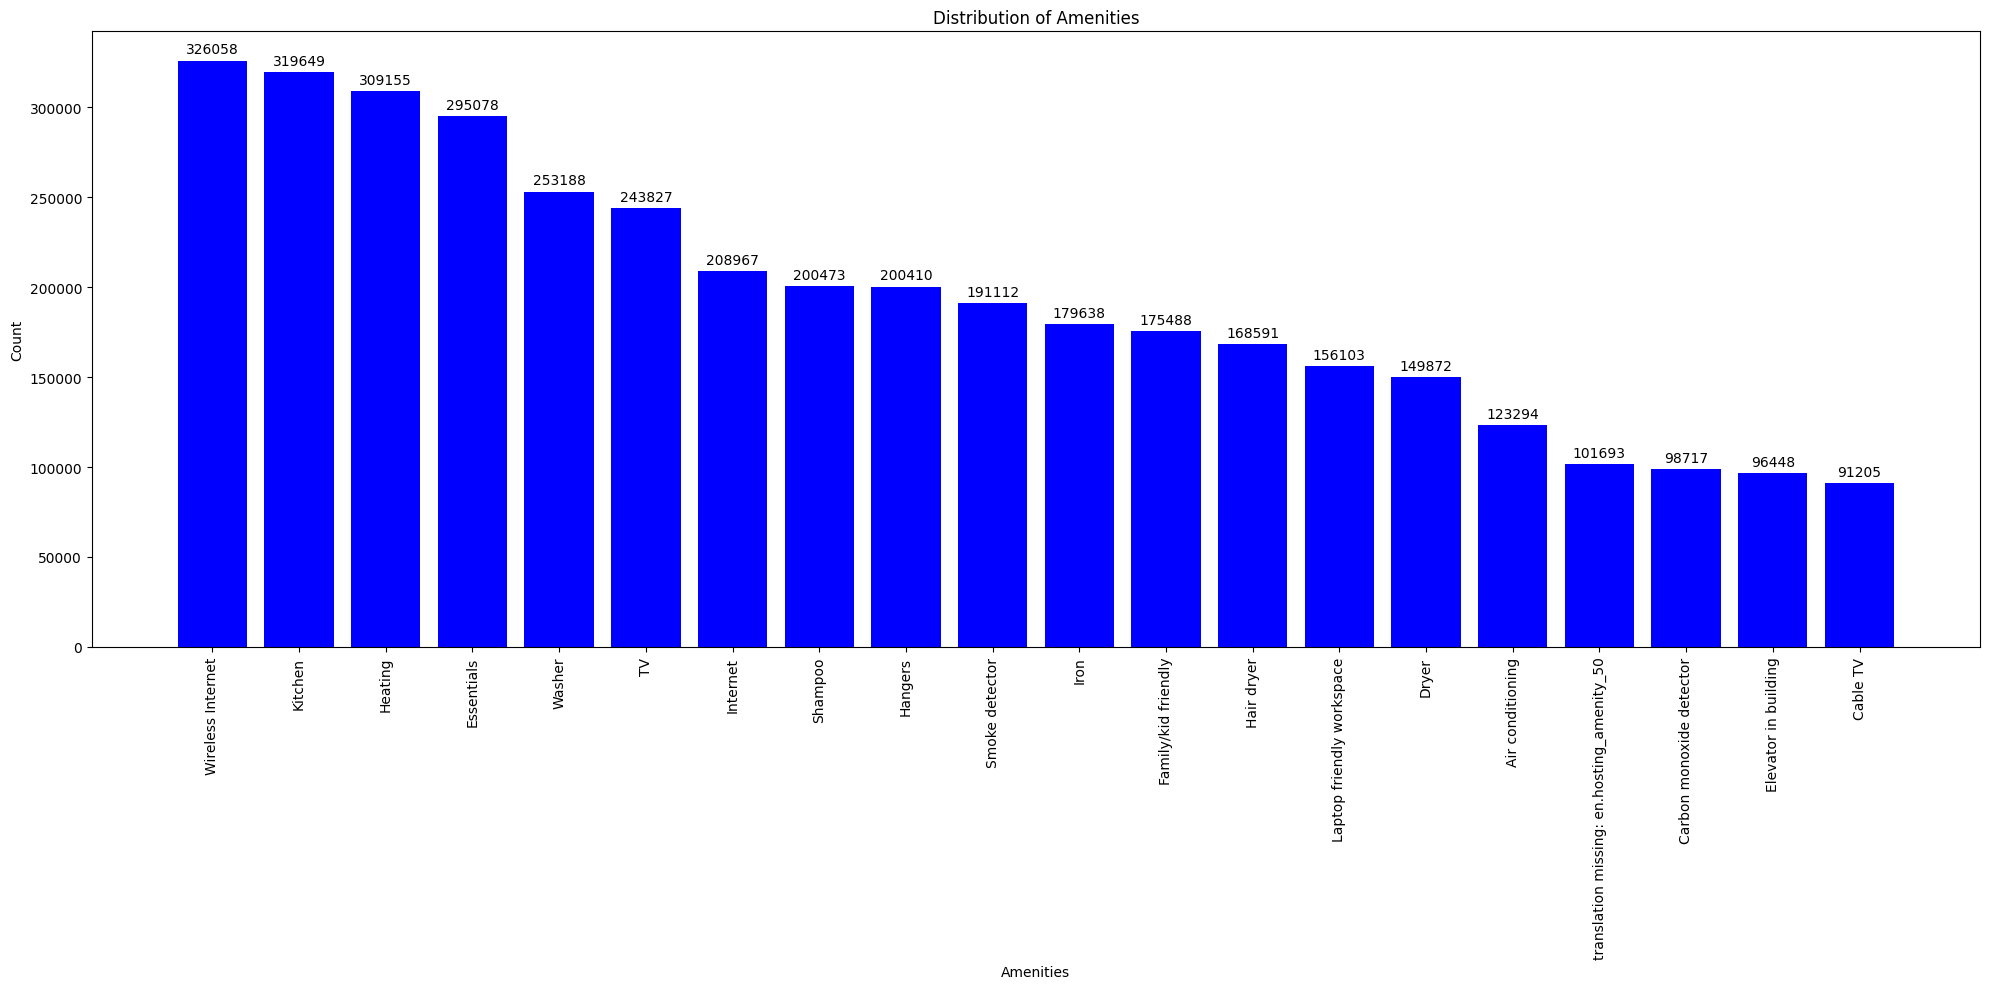

In [ ]:
barplot_counts(amenity_counts_pd["Amenities"],amenity_counts_pd["count"],"Amenities")

In [ ]:
amenities_avail = df_amenity_exploded.groupBy("Amenities").agg(mean("Availability 365").alias("Availability")).orderBy(desc("Availability")).limit(20)
amenities_price = df_amenity_exploded.groupBy("Amenities").agg(mean("Price").alias("AvgPrice")).orderBy(desc("AvgPrice")).limit(20)

amenities_avail_pd = amenities_avail.toPandas()
amenities_price_pd = amenities_price.toPandas()

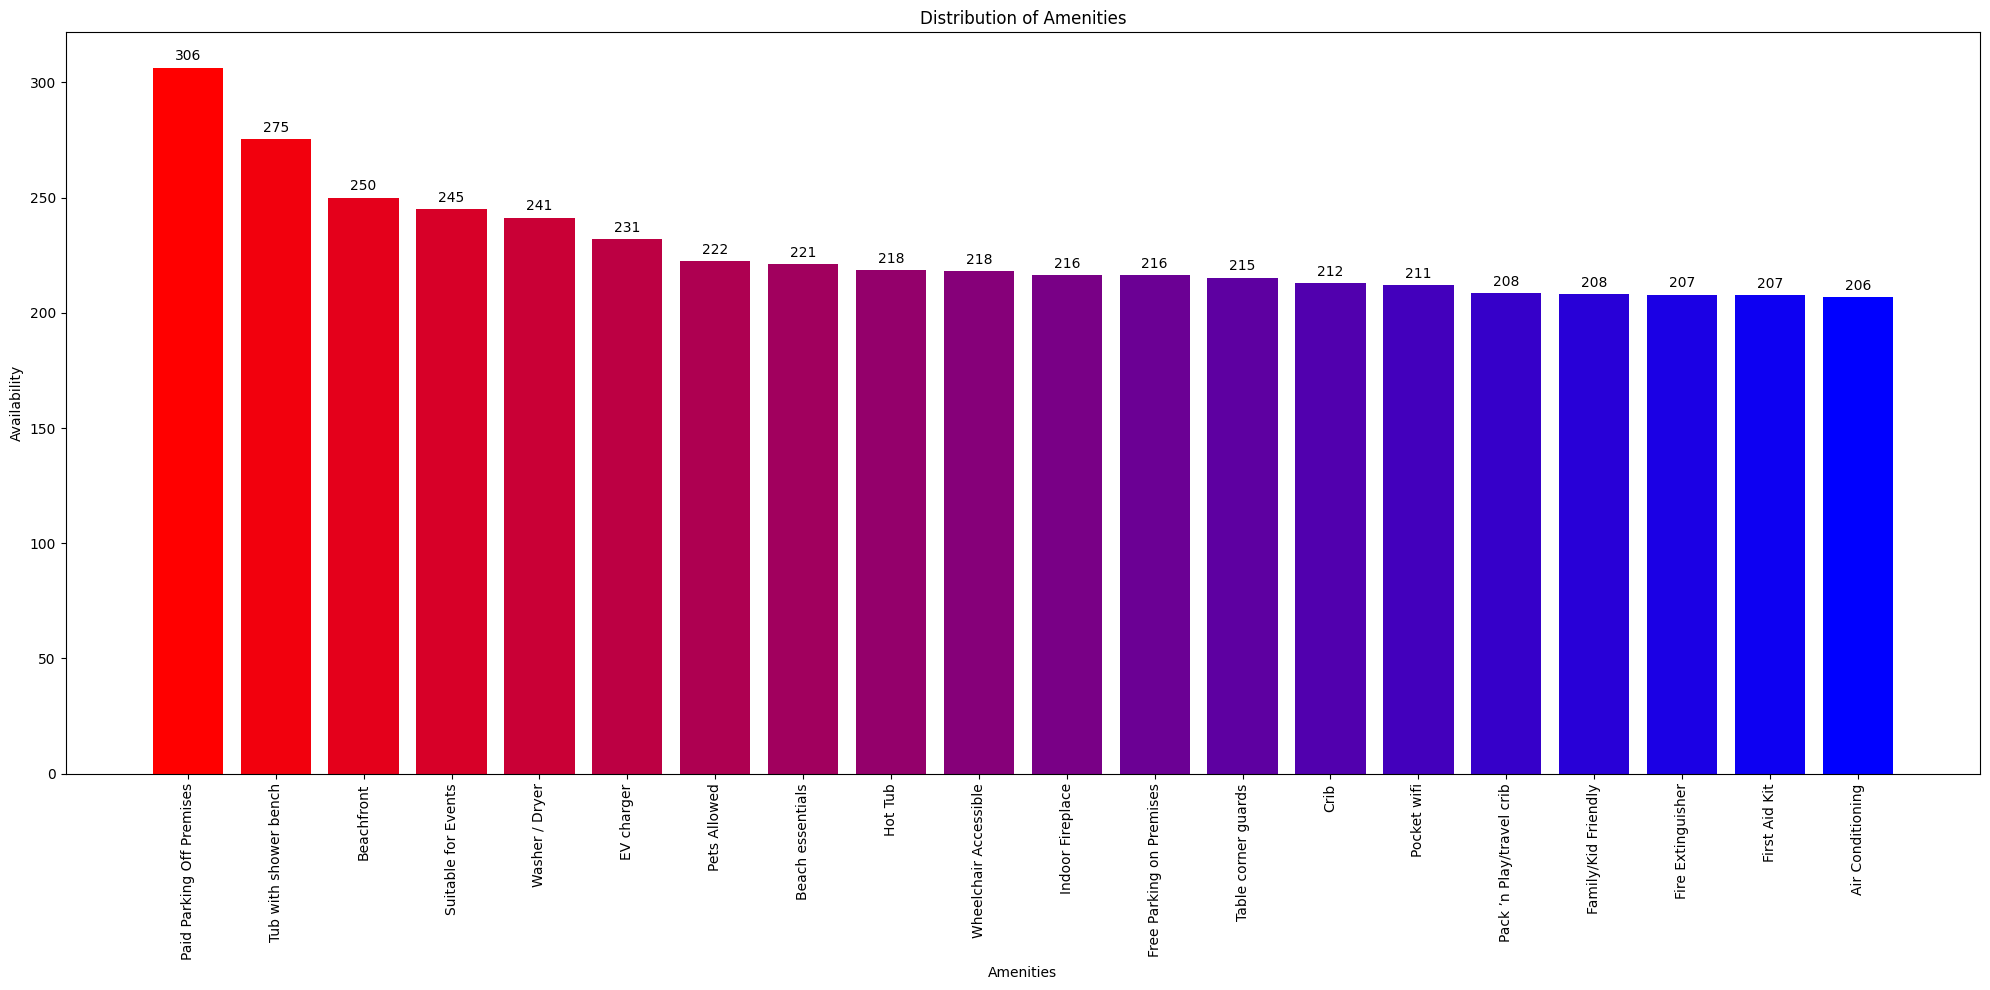

In [ ]:
barplot_avail(amenities_avail_pd["Amenities"],amenities_avail_pd["Availability"],label = "Amenities")

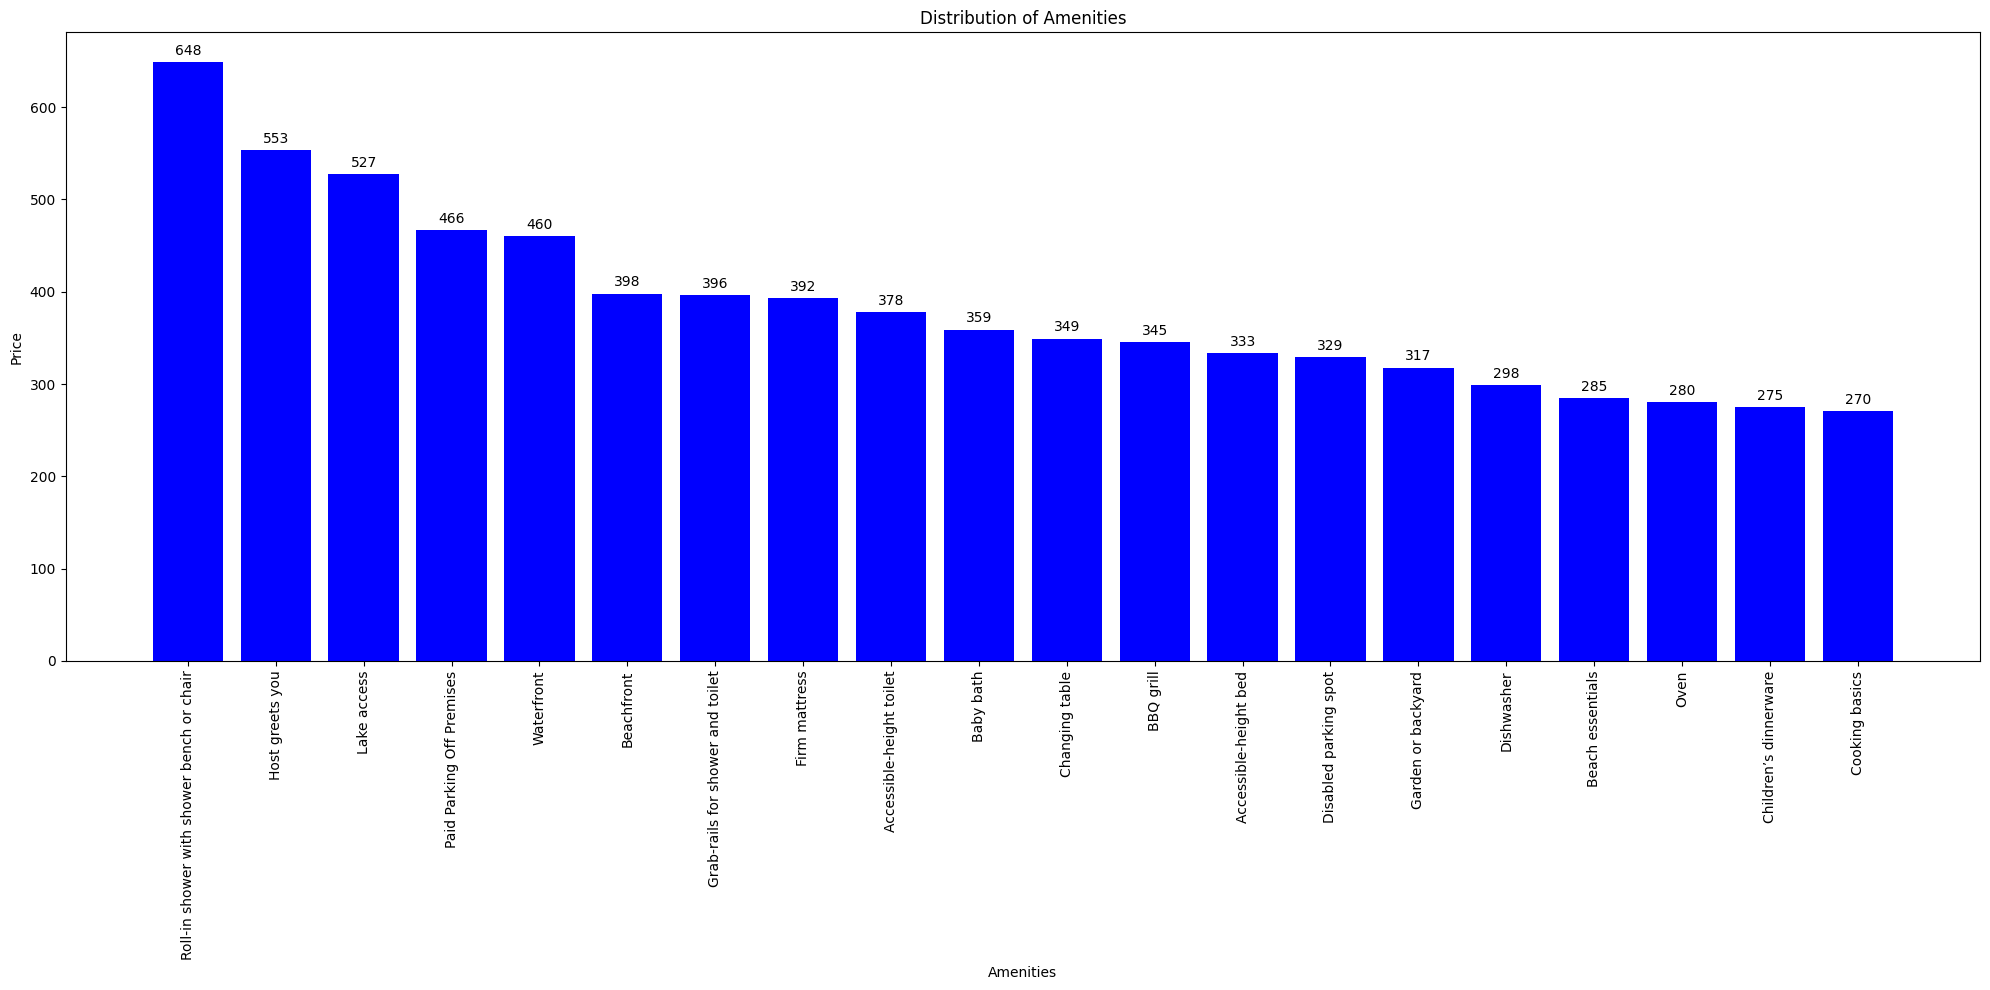

In [ ]:
barplot_price(amenities_price_pd["Amenities"],amenities_price_pd["AvgPrice"],label = "Amenities")

# Host Response behavior

In [ ]:
# Define the mapping
response_time_mapping = {
    "a few days or more": 0,
    "within a day": 1,
    "within a few hours": 2,
    "within an hour": 3
}

# Create a new column "Encoded_Response_Time" based on the mapping
df_hrb = df.withColumn("Host Response Time", when(col("Host Response Time") == "a few days or more", "a few days or more")
                                        .when(col("Host Response Time") == "within a day", "within a day")
                                        .when(col("Host Response Time") == "within a few hours", "within a few hours")
                                        .when(col("Host Response Time") == "within an hour", "within an hour")
                                        .otherwise("No data"))

df_hrb.show()

+--------+--------------------+--------------+------------+--------------------+--------------------+--------------------+--------------------+-------------------+---------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------+--------------------+--------------+----------+--------------------+--------------------+------------------+------------------+--------------------+--------------------+--------------------+------------------+-------------------+-------------------------+--------------------+--------------------+-------------+----------------------+----------------------------+---------+-------------+-------+---------+--------------------+------------+-----------+------------------+------------------+---------------+---------------+------------+---------+--------+----+-------------+--------------------+-----------+-----+------

In [ ]:
host_resp_avail = df_hrb.groupBy("Host Response Time").agg(mean("Availability 365").alias("Availability")).orderBy(("Availability"))
host_resp_avail_pd = host_resp_avail.toPandas()

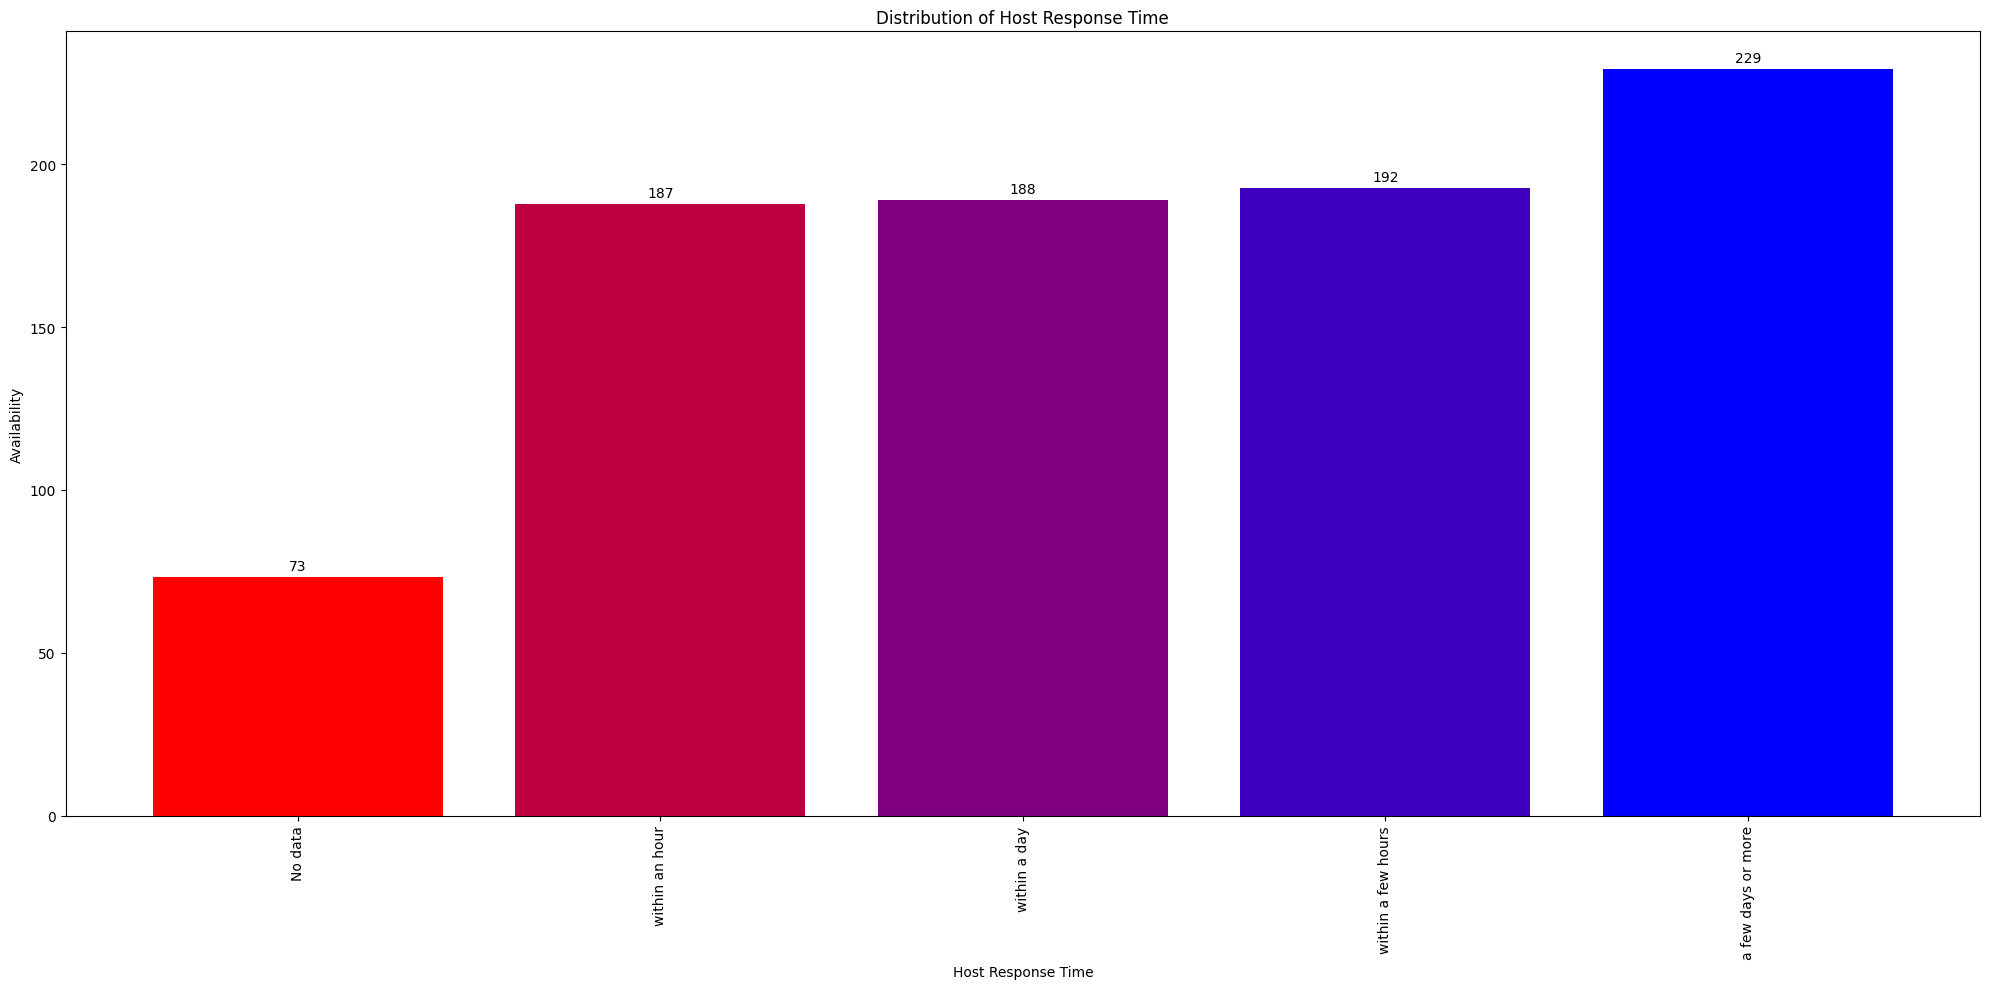

In [ ]:
barplot_avail(host_resp_avail_pd["Host Response Time"],host_resp_avail_pd["Availability"],label = "Host Response Time")

# Review Score Cleanliness

In [ ]:
rev_clean_avail = df.groupBy("Review Scores Cleanliness").agg(mean("Availability 365").alias("Availability")).orderBy(("Review Scores Cleanliness"))
rev_clean_avail_pd = rev_clean_avail.toPandas()

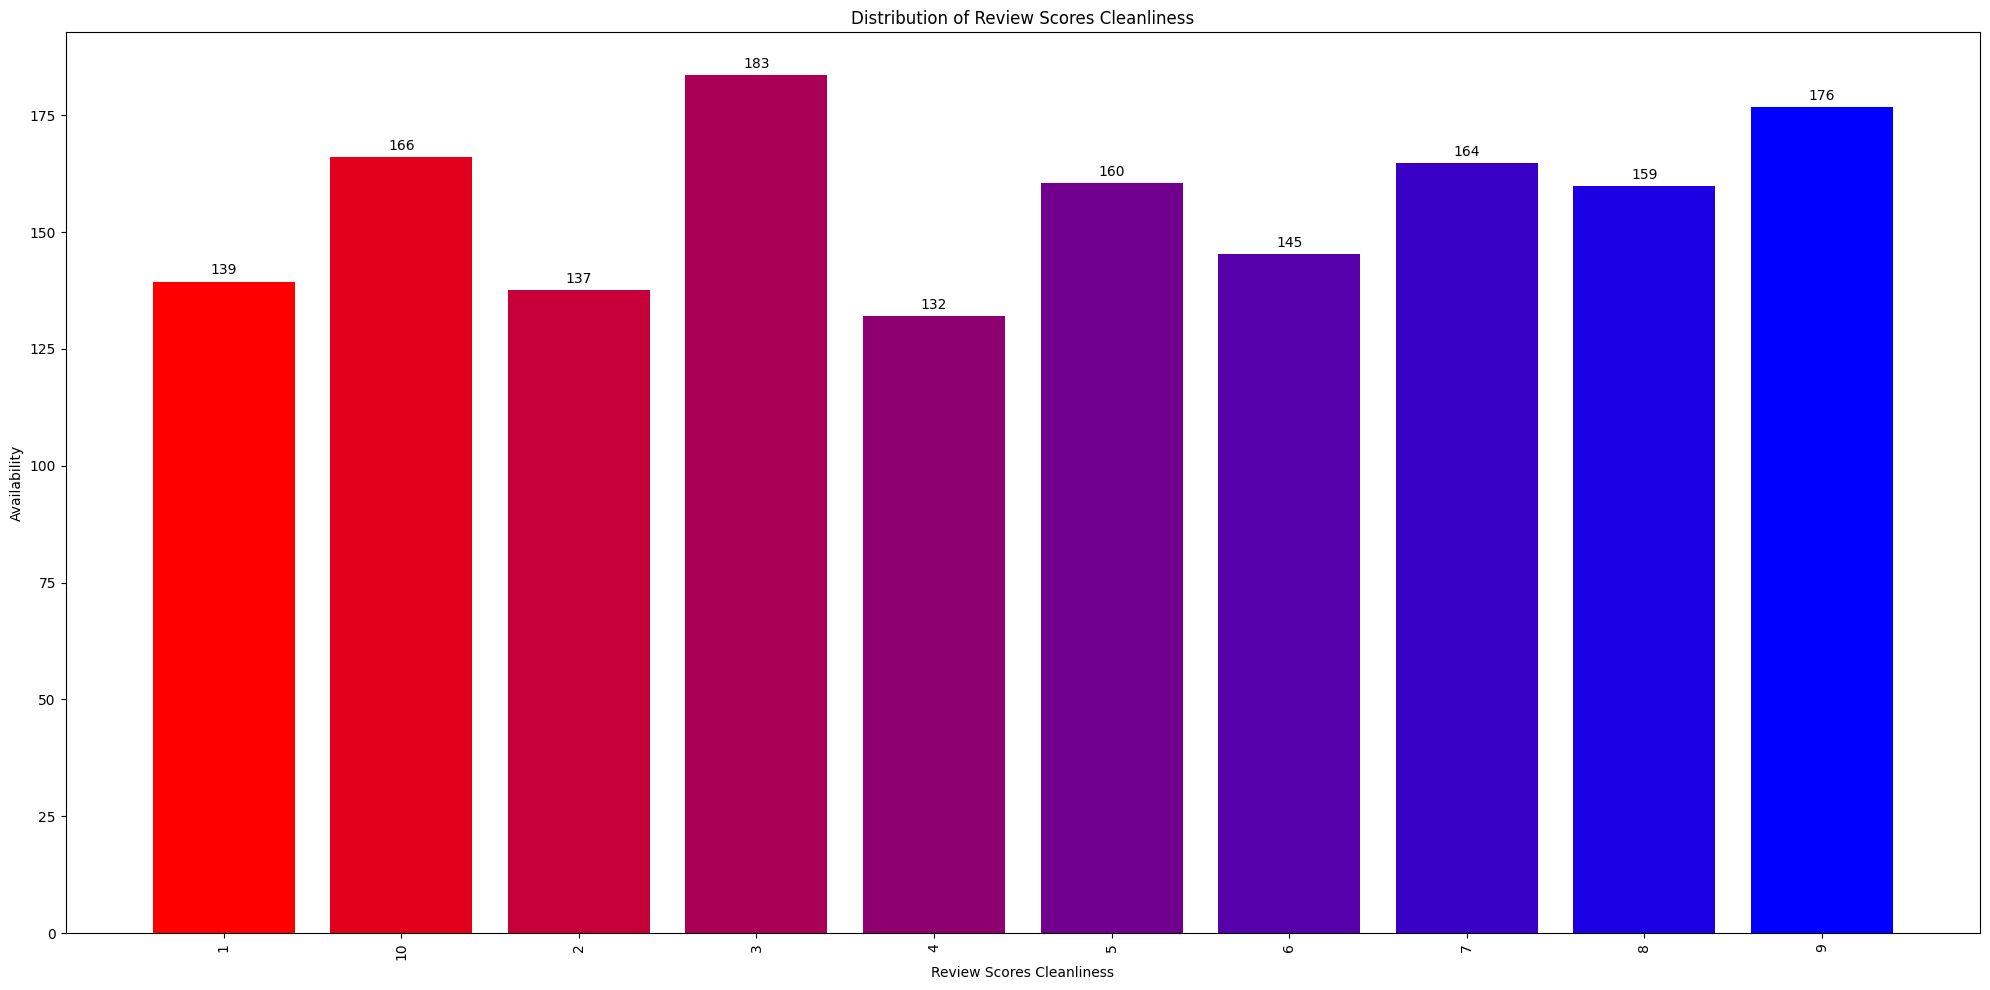

In [ ]:
barplot_avail(rev_clean_avail_pd["Review Scores Cleanliness"],rev_clean_avail_pd["Availability"],label = "Review Scores Cleanliness")

# Review Score Communication

In [ ]:
rev_comm_avail = df.groupBy("Review Scores Communication").agg(mean("Availability 365").alias("Availability")).orderBy(("Review Scores Communication"))
rev_comm_avail_pd = rev_comm_avail.toPandas()

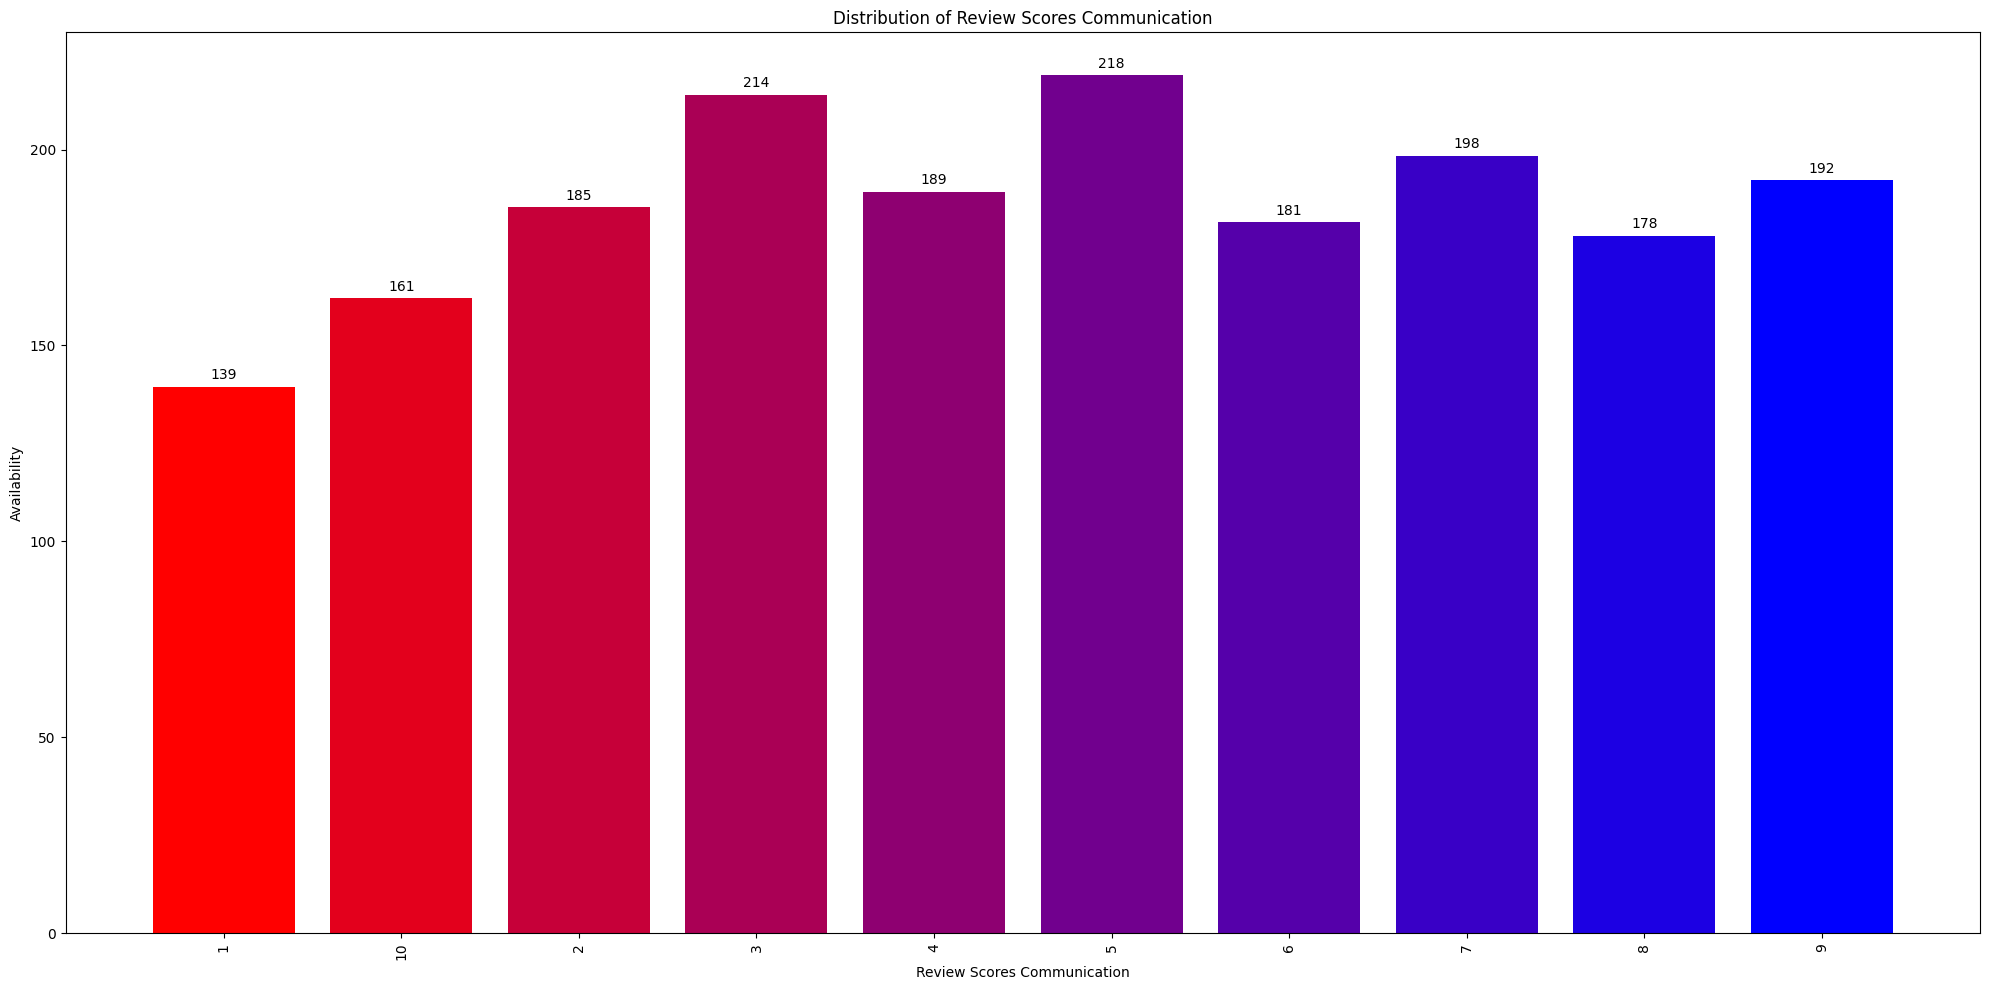

In [ ]:
barplot_avail(rev_comm_avail_pd["Review Scores Communication"],rev_comm_avail_pd["Availability"],label = "Review Scores Communication")